## Project name : Insurance Claim Prediction

## project ID: PRCP-1010-InsClaimPred

## Group ID :- PTID-CDS-MAY-25-2657

## Introduction



This project focuses on an **Insurance Claim Prediction** dataset. The primary goal is to develop a machine learning model that can accurately predict the probability that a policyholder will file an insurance claim in the upcoming year.

In real-world insurance scenarios, accurately estimating risk is essential. Ideally, cautious drivers should receive lower premiums, while risky drivers should be appropriately charged higher. However, inaccuracies in assessing driver behavior can lead to unfair pricing and financial loss for insurance companies.

In this project, we aim to address that gap by analyzing historical insurance data and building a predictive model. The model helps identify potential claimants, enabling better pricing strategies and risk management for insurers.

This end-to-end project demonstrates the application of data science techniques to a practical and impactful business problem in the insurance domain.


In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Loading the Dataset

In [4]:
df = pd.read_csv(r"C:\Users\jeeva\Downloads\PRCP-1010-InsClaimPred\Data\train.csv")
df

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


## Basic Checks

In [5]:
df.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [6]:
df.shape

(595212, 59)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [8]:
df = df.drop(['id'], axis = 1)

In [9]:
df

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,0,3,1,10,0,0,0,0,0,1,...,4,1,9,6,0,1,1,0,1,1
595208,0,5,1,3,0,0,0,0,0,1,...,4,1,3,8,1,0,1,0,1,1
595209,0,1,1,10,0,0,1,0,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,0,5,2,3,1,0,0,0,1,0,...,4,1,4,2,0,1,1,1,0,0


In [10]:
Duplicate_value = df[df.duplicated()]

In [11]:
Duplicate_value

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin


In [12]:
df.isnull().sum()

target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0


## Seperating the binary, categorical and continous features

In [13]:
bin_cols = [col for col in df.columns if '_bin' in col]
cat_cols = [col for col in df.columns if '_cat' in col]
float_cols = df.select_dtypes('float64').columns.tolist()


In [14]:
bin_cols

['ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

In [15]:
cat_cols

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [16]:
float_cols

['ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03']

In [17]:
df['target'].unique()

array([0, 1], dtype=int64)

In [18]:
df['target'].value_counts()

target
0    573518
1     21694
Name: count, dtype: int64

In [19]:
df.describe()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
## Splitting the dataset

y=df['target']
x=df.drop(columns = 'target', axis = 1)

In [21]:
x

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2,5,1,0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
1,1,1,7,0,0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
2,5,4,9,1,0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0
3,0,1,2,0,0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,2,0,1,0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,3,1,10,0,0,0,0,0,1,0,...,4,1,9,6,0,1,1,0,1,1
595208,5,1,3,0,0,0,0,0,1,0,...,4,1,3,8,1,0,1,0,1,1
595209,1,1,10,0,0,1,0,0,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,5,2,3,1,0,0,0,1,0,0,...,4,1,4,2,0,1,1,1,0,0


In [22]:
y

0         0
1         0
2         0
3         0
4         0
         ..
595207    0
595208    0
595209    0
595210    0
595211    0
Name: target, Length: 595212, dtype: int64

## Univariate distribution plot 

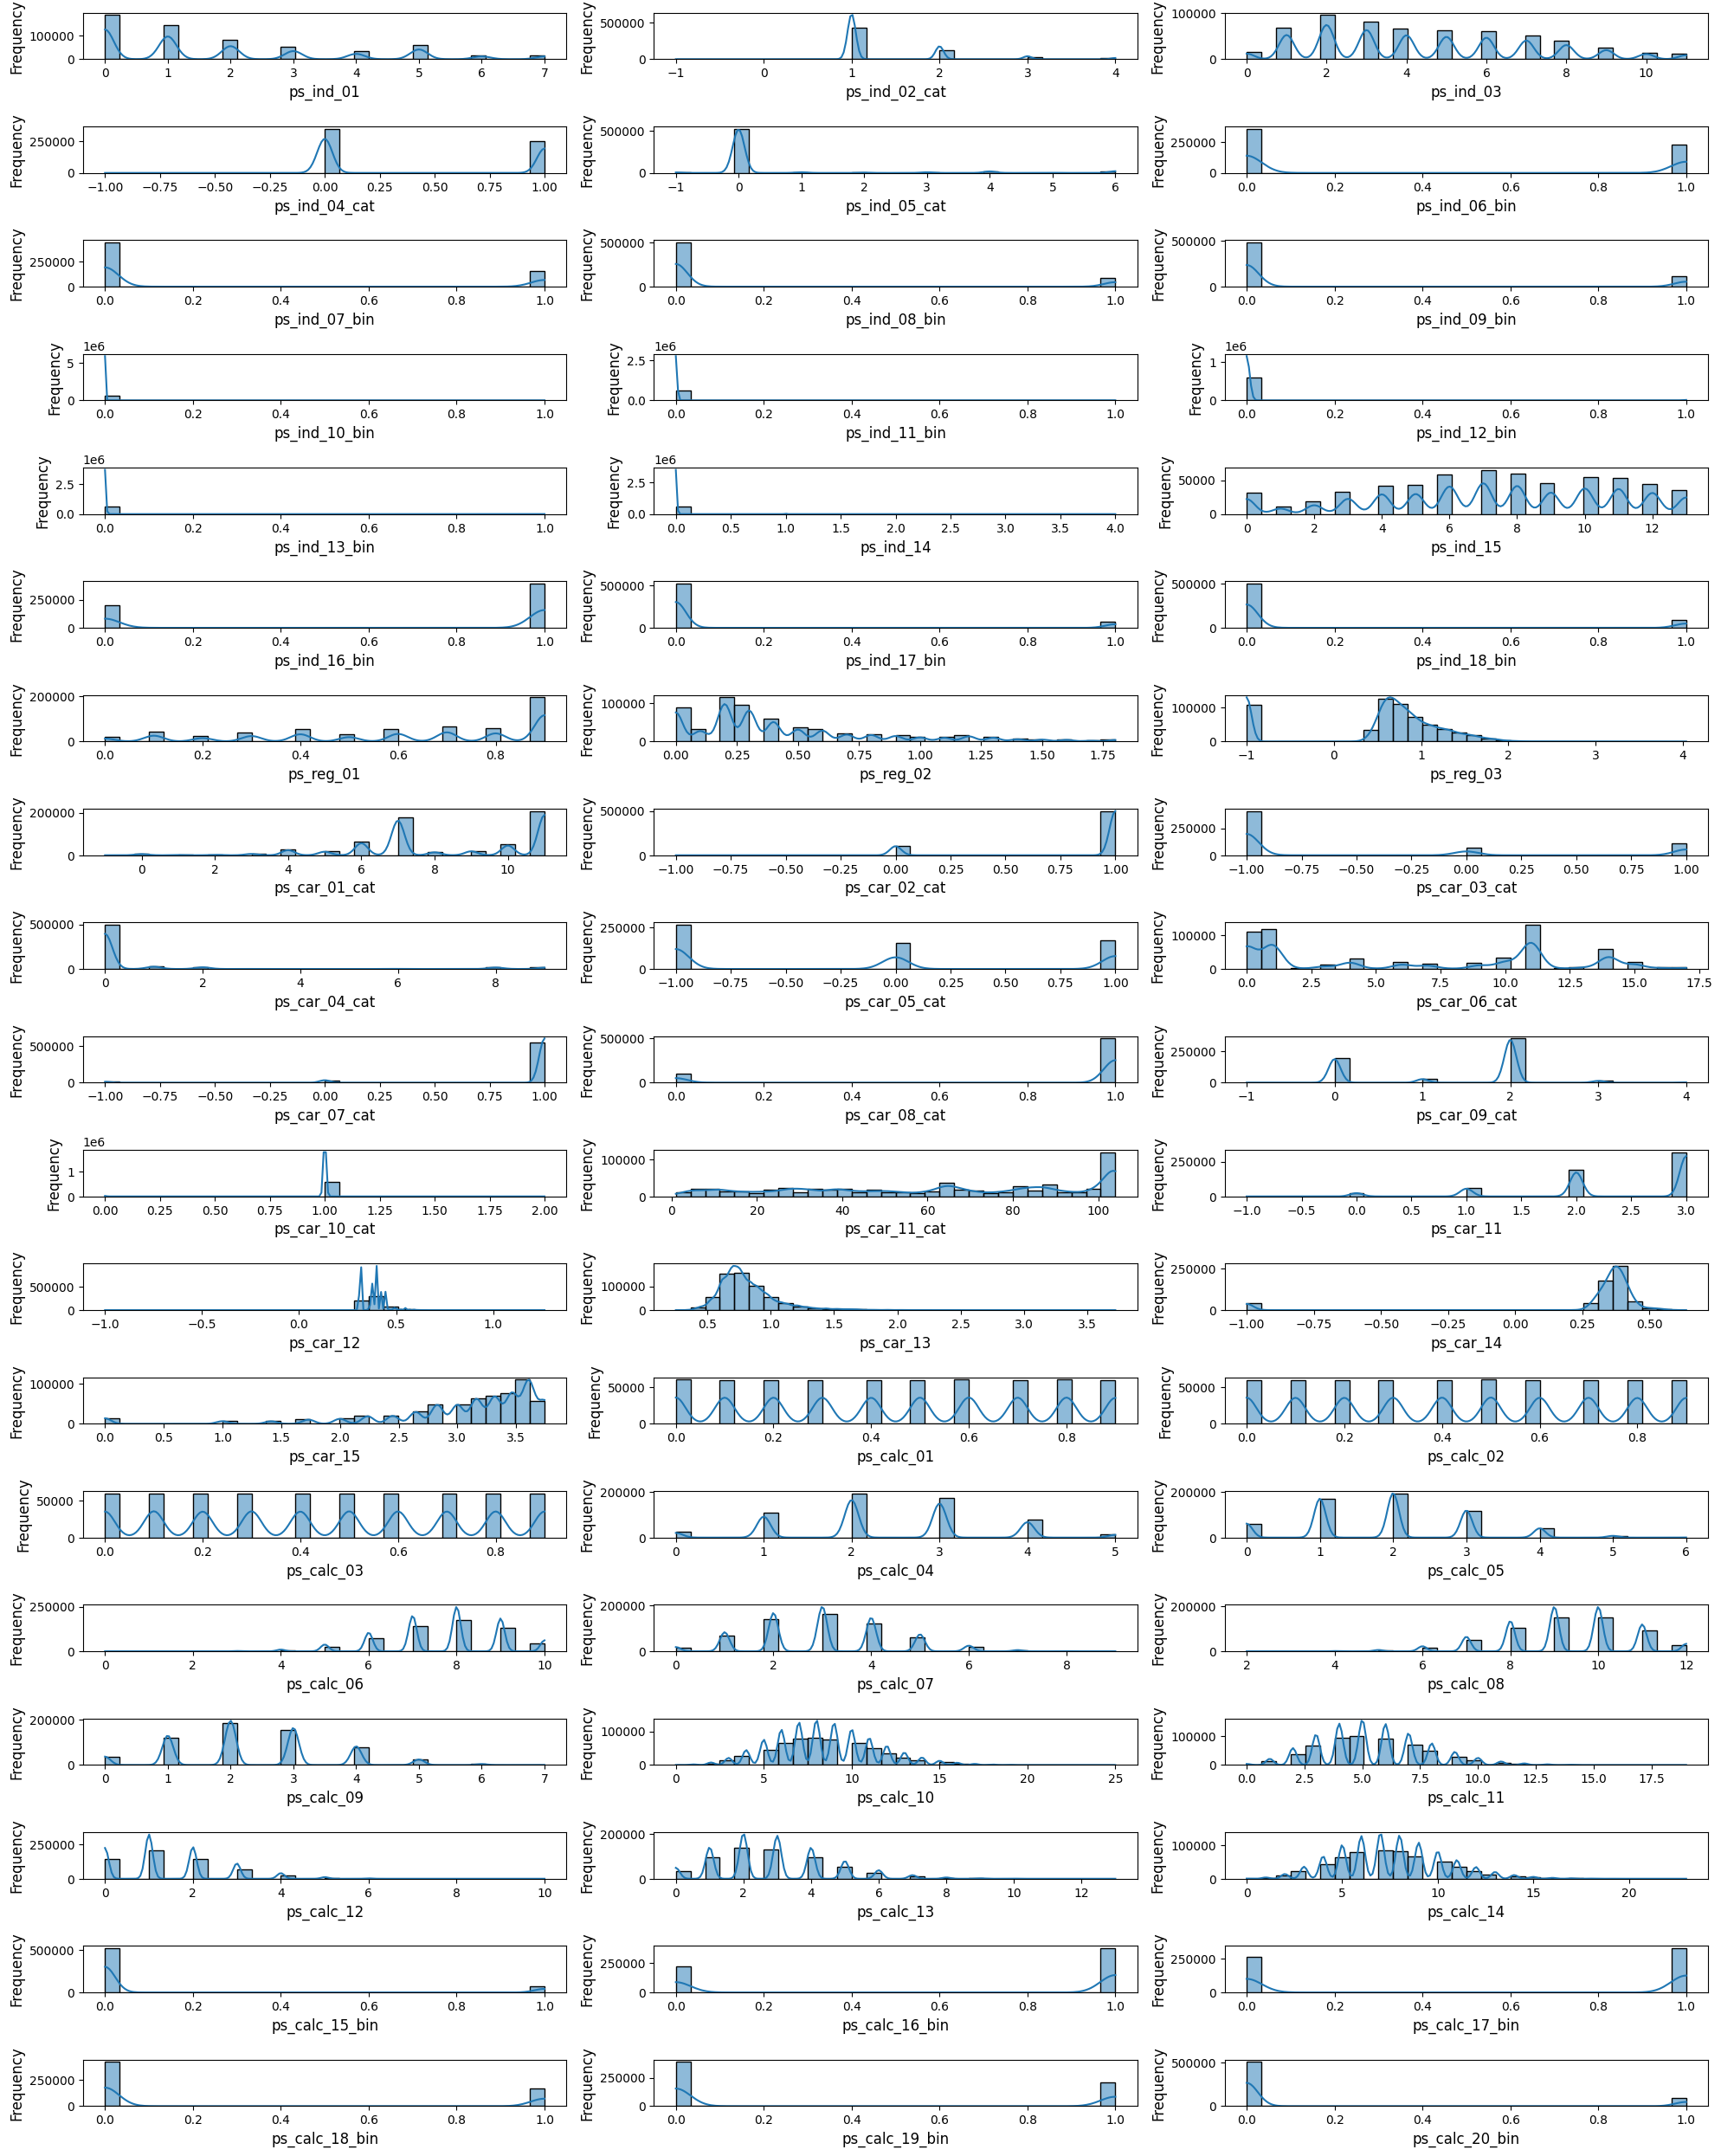

In [21]:

plt.figure(figsize=(20, 25), facecolor='white')  # Set canvas
plotnumber = 1  # Counter

for column in x.columns:  # Accessing the columns
    if plotnumber <= 57:
        ax = plt.subplot(19, 3, plotnumber)
        
        
        sns.histplot(x[column], kde=True, bins=30, ax=ax)
        
        plt.xlabel(column, fontsize=12)  # Label x-axis
        plt.ylabel('Frequency', fontsize=12)  # More accurate label than 'Loan_Status'
        
        plotnumber += 1  # Counter increment

plt.tight_layout()
plt.show()


The plots show that some features look pretty normal, but lots of them are skewed or have spikes — like they might be categories or have outliers. We’ll probably need to clean up and transform some of these before using them in a model.

## Bivariate distribution plot

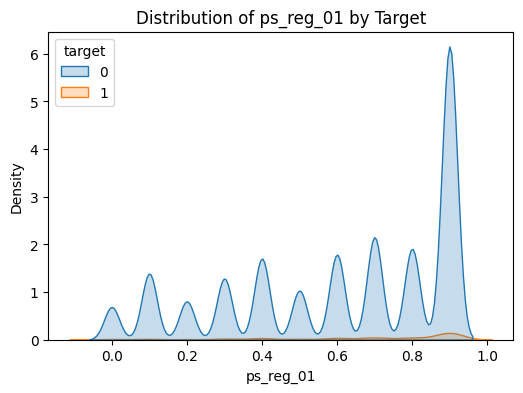

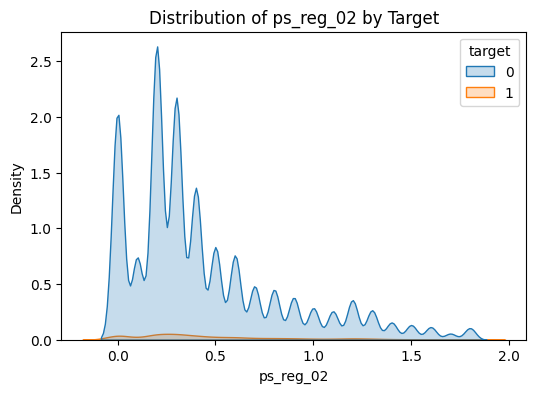

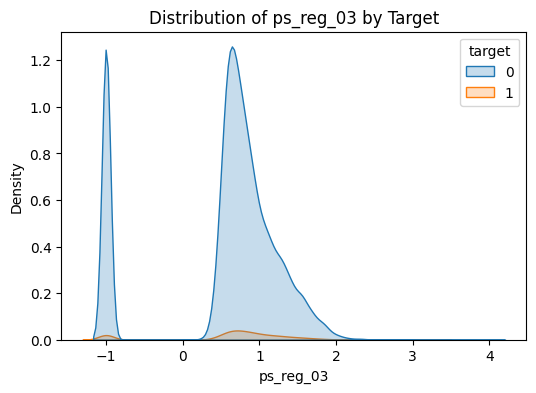

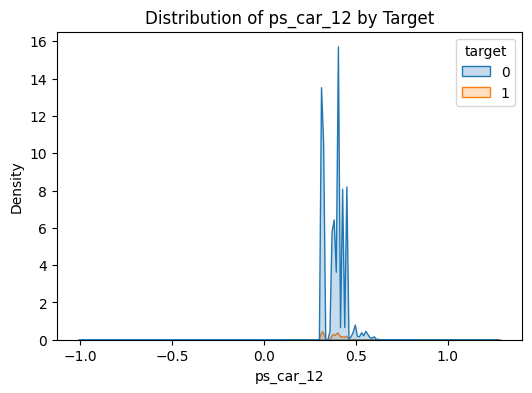

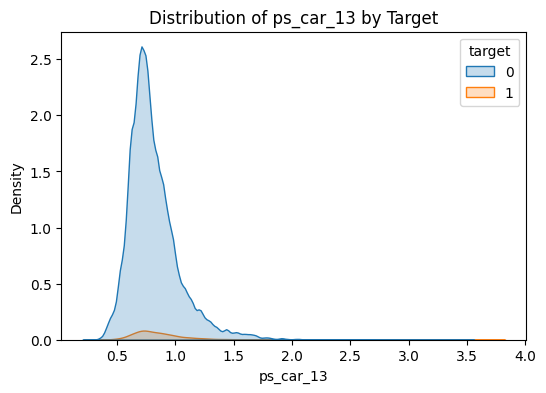

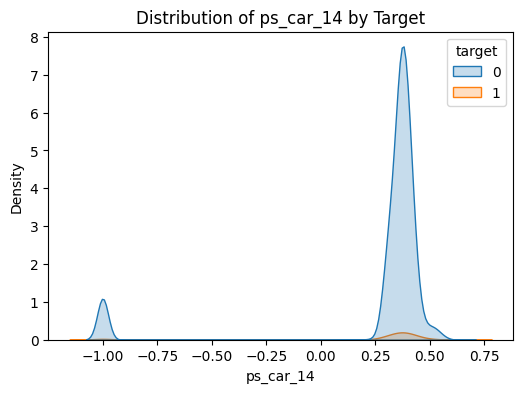

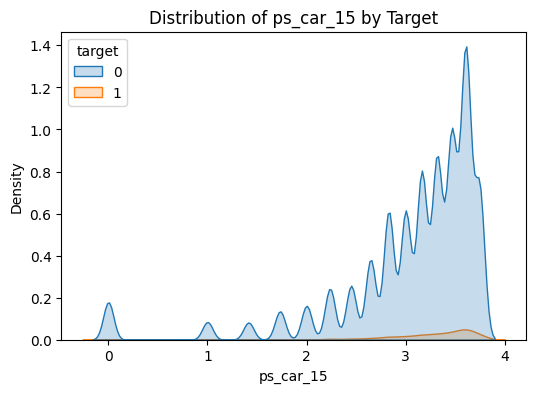

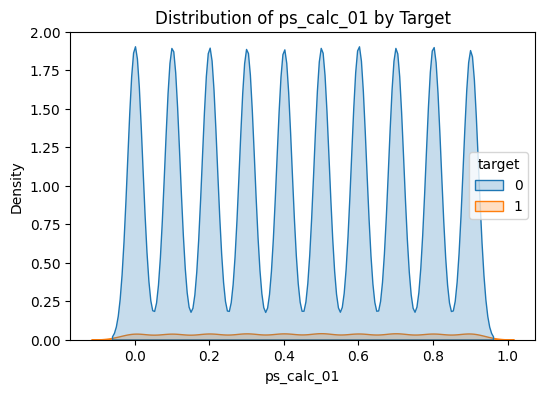

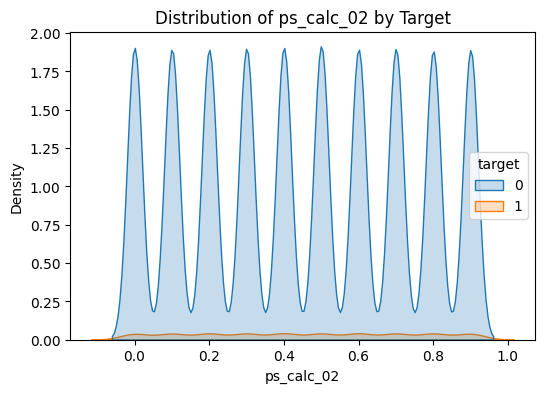

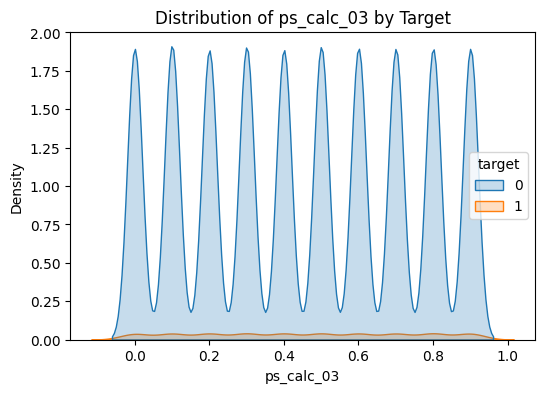

In [22]:
#  Float Feature Comparison by Target
for col in float_cols:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df, x=col, hue='target', fill=True)
    plt.title(f'Distribution of {col} by Target')
    plt.show()


## Insights

The KDE plot for ps_car_14 shows that the distribution for target = 1 is shifted slightly to the right compared to target = 0, indicating higher values are somewhat associated with default cases. However, there is substantial overlap between the two groups, suggesting this feature alone may not perfectly distinguish defaults.

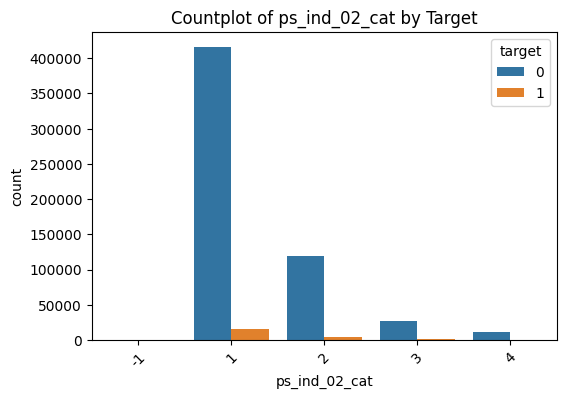

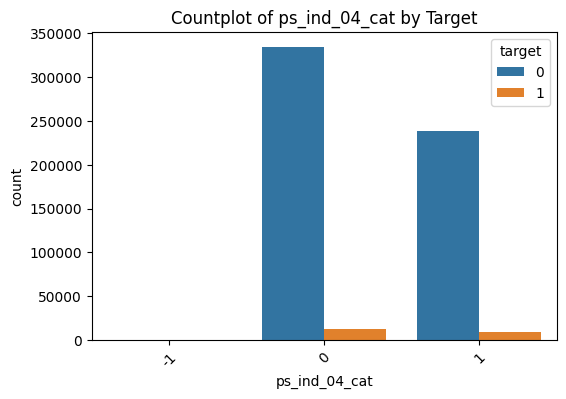

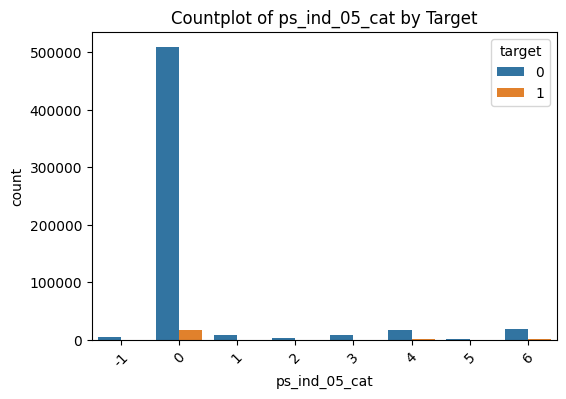

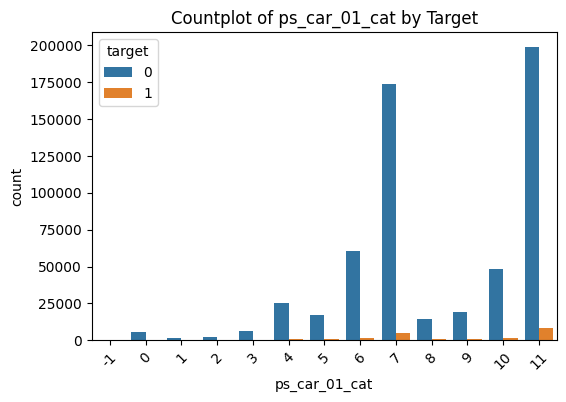

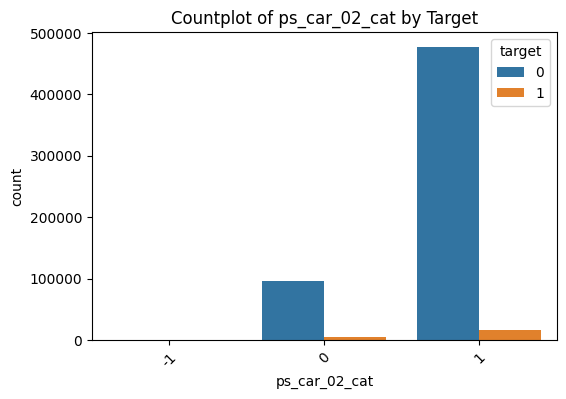

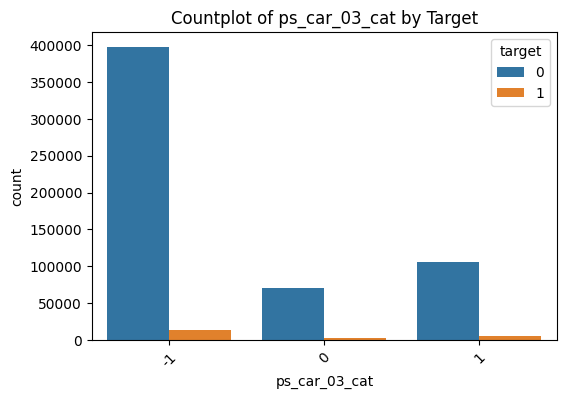

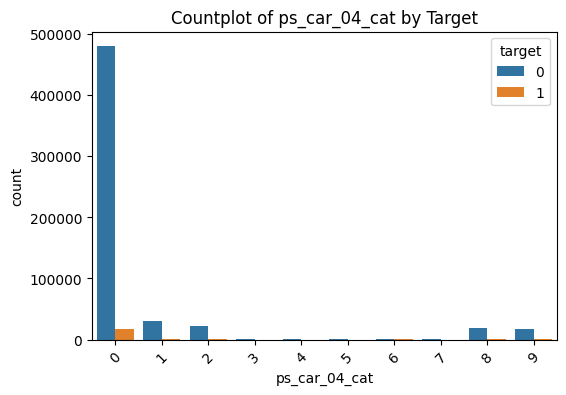

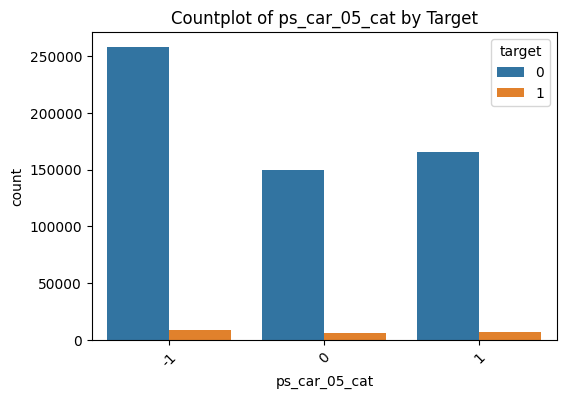

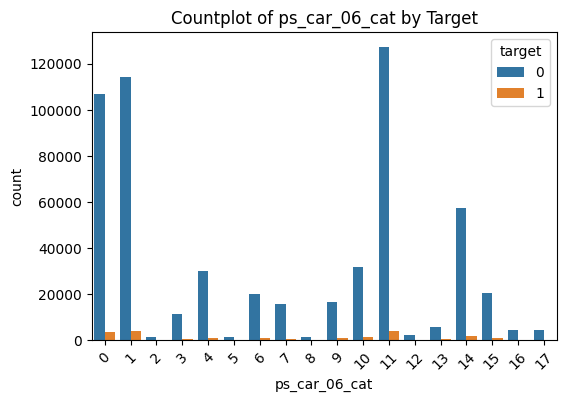

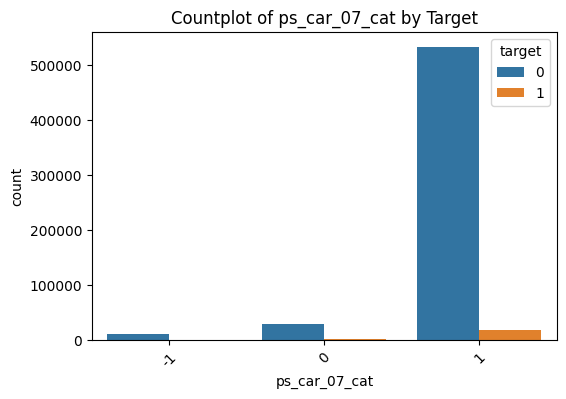

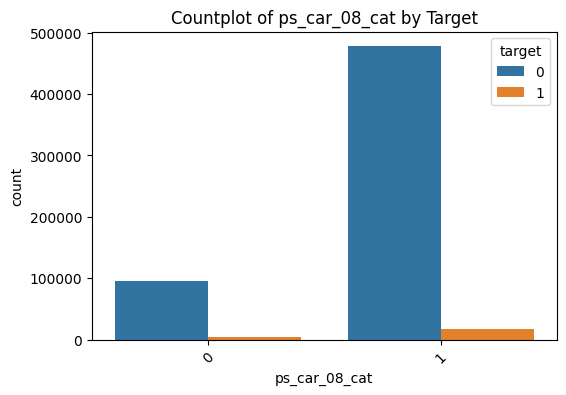

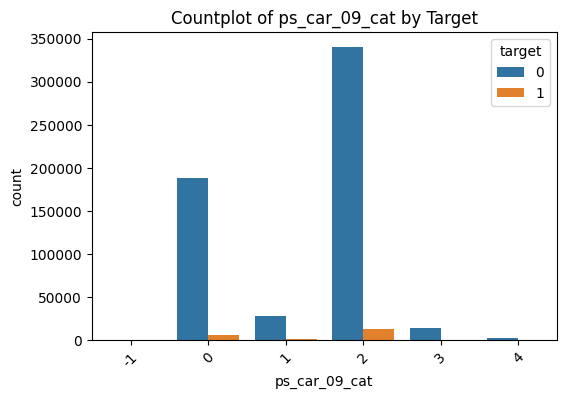

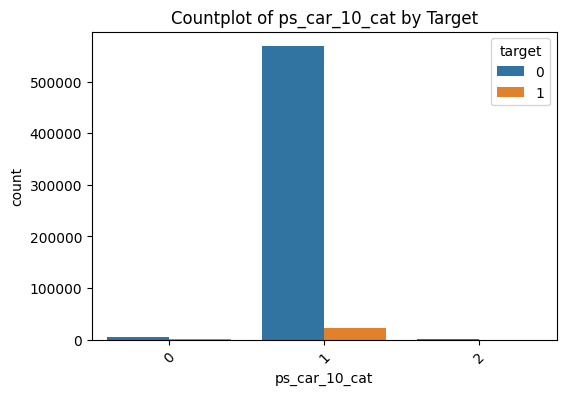

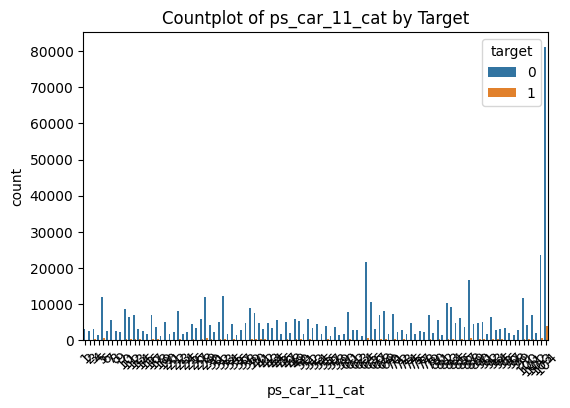

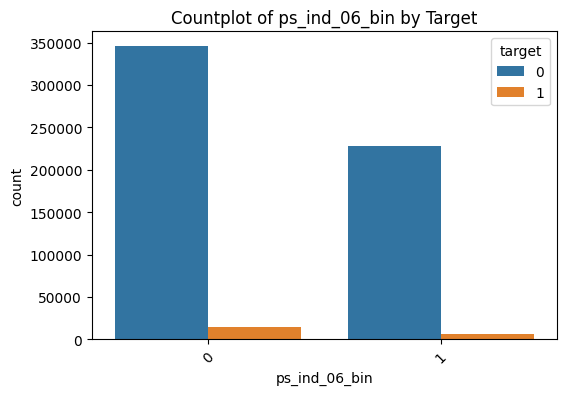

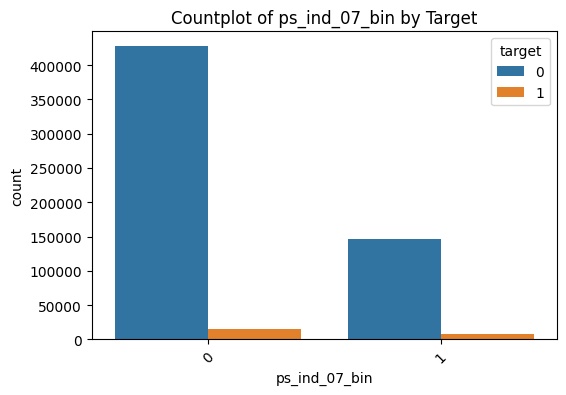

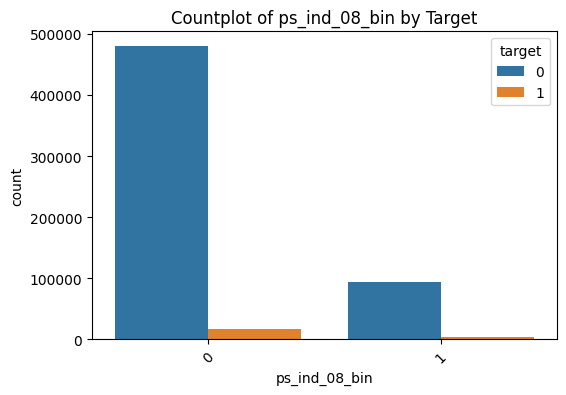

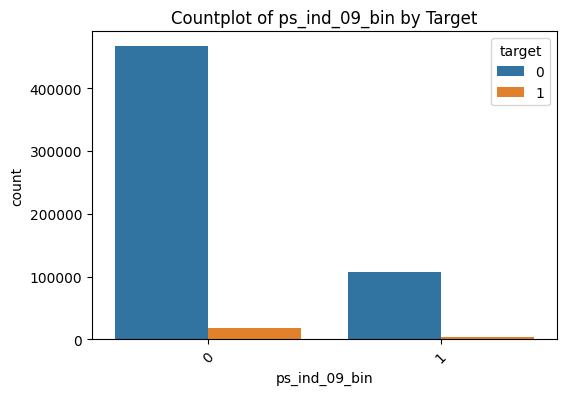

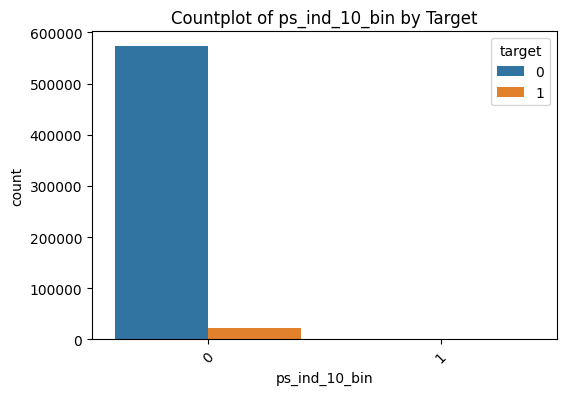

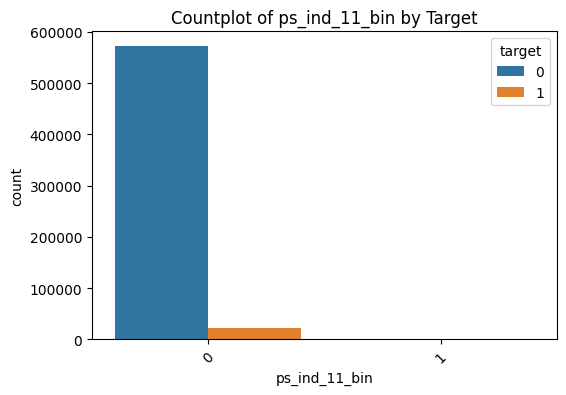

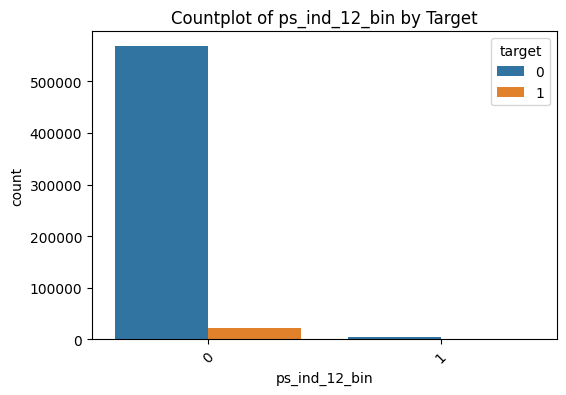

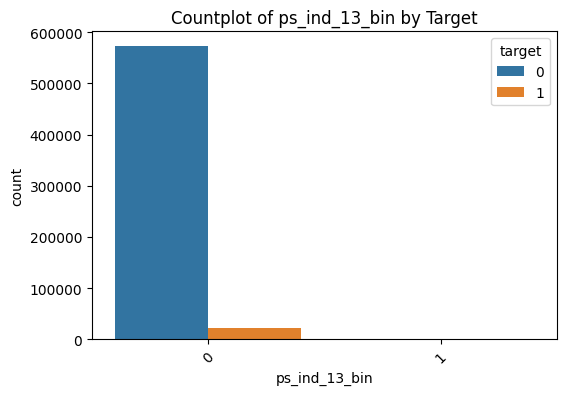

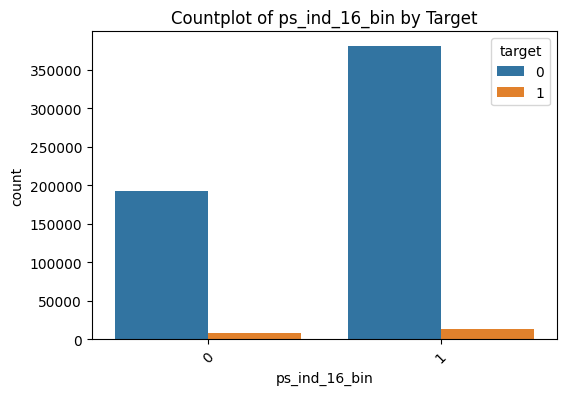

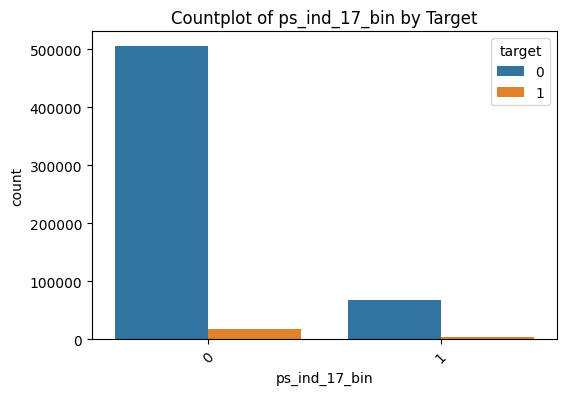

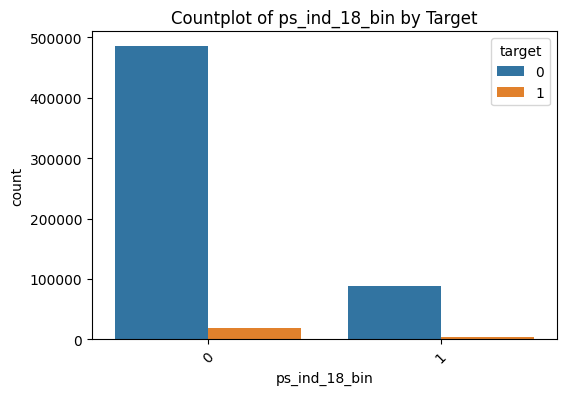

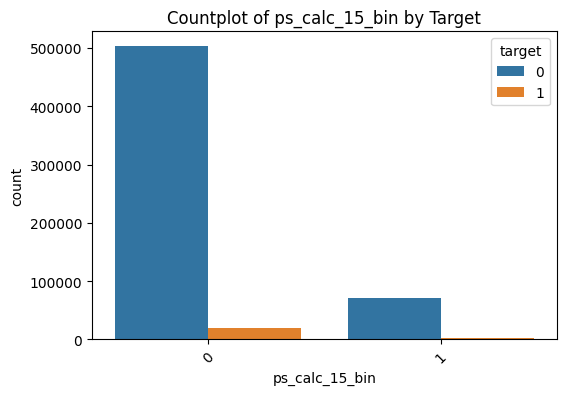

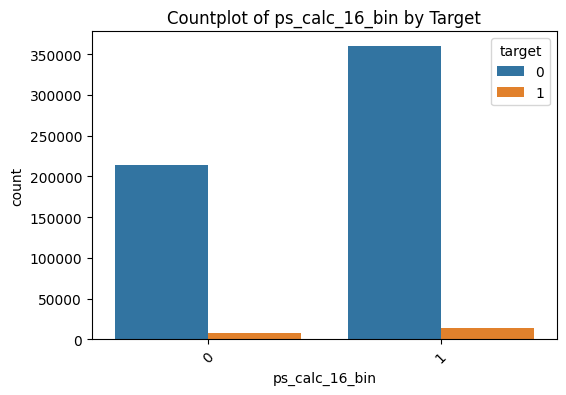

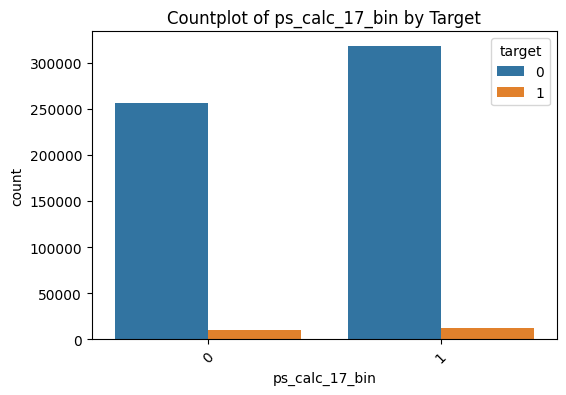

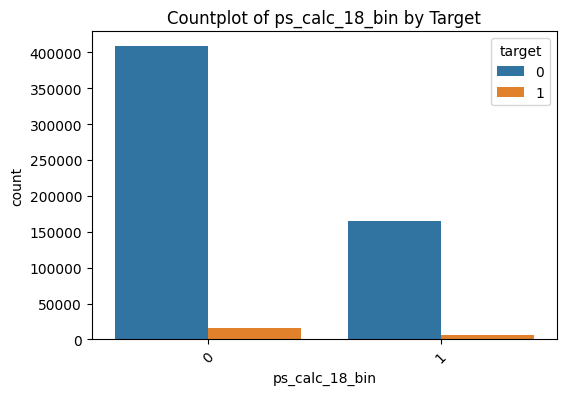

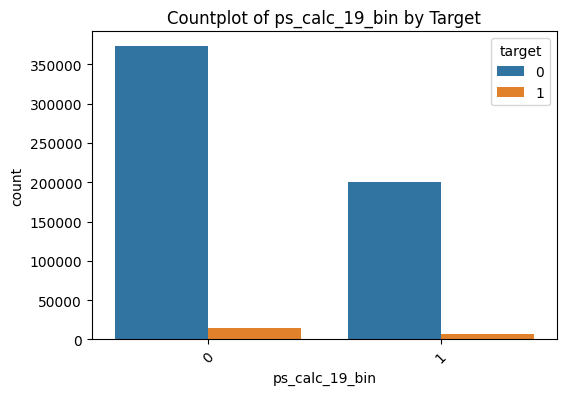

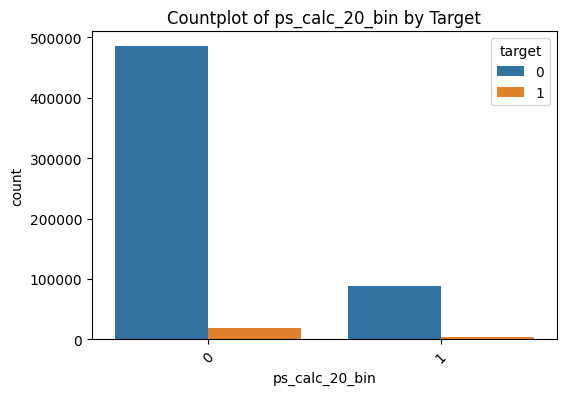

In [29]:
## Categorical and Binary Feature distribution in relation to target

for col in cat_cols + bin_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='target')
    plt.title(f'Countplot of {col} by Target')
    plt.xticks(rotation=45)
    plt.show()


### Binary Feature Insights

Some binary features like **ps_ind_16_bin** and **ps_calc_15_bin** have more 1s in the default group (target=1), which means these flags might be linked to higher default risk.

Other binary features look pretty similar between default and non-default groups, so they might not be very useful by themselves.

---

### Categorical Feature Insights

In **ps_car_03_cat**, category **2** pops up more often for people who defaulted, so that group might be a bit riskier.

We also see uneven patterns in **ps_car_07_cat** and **ps_car_10_cat**, which could mean they help spot different types of customers based on their risk.



## Outlier Detection

Outlier Summary:
                  Q1        Q3       IQR  Lower Limit  Upper Limit  \
ps_car_13  0.670867  0.906190  0.235324     0.317881     1.259176   
ps_reg_03  0.666615  1.000000  0.333385     0.166536     1.500078   
ps_car_14  0.353553  0.396485  0.042931     0.289157     0.460881   
ps_car_12  0.316228  0.400000  0.083772     0.190569     0.525658   

           Below Lower Limit  Above Upper Limit  
ps_car_13                 13              26900  
ps_reg_03                 45              35469  
ps_car_14               9267              21153  
ps_car_12                 60              15295  

Total outliers: 108202
Percentage of outliers: 18.18%


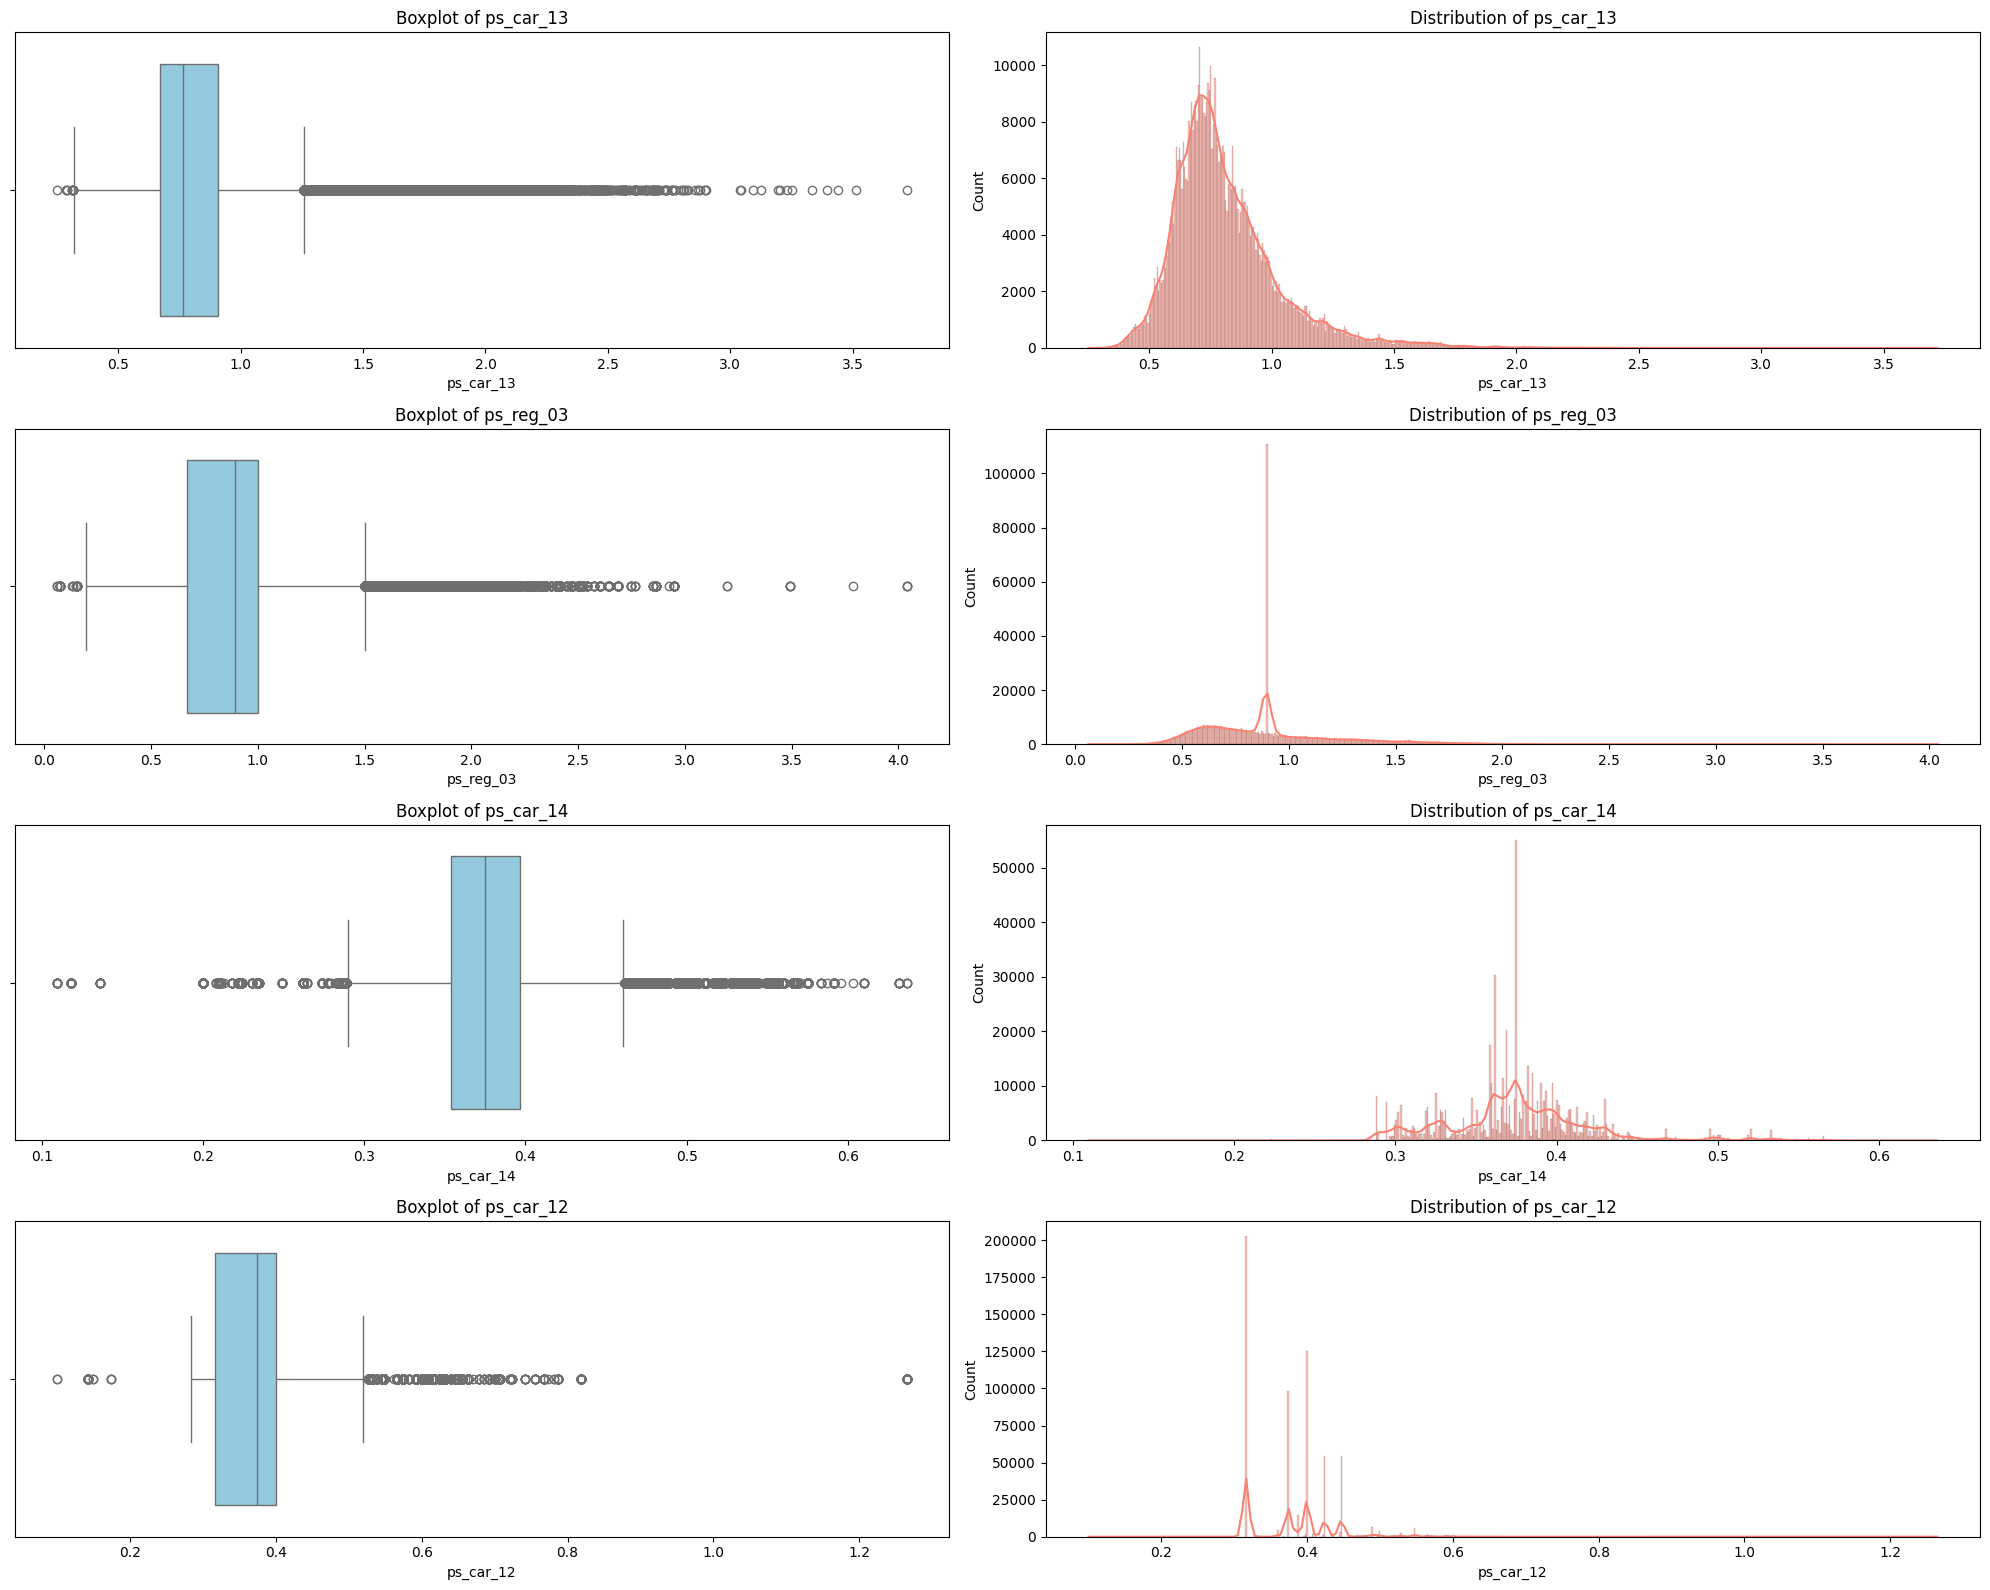

In [21]:

# Copy your original dataset
df = df.copy()

# Step 1: Define the numerical columns to process
numerical_cols = ['ps_car_13', 'ps_reg_03', 'ps_car_14', 'ps_car_12']

# Step 2: Replace negative values with mean of positive values
for col in numerical_cols:
    mean_positive = df[df[col] >= 0][col].mean()
    df.loc[df[col] < 0, col] = mean_positive

# Step 3: IQR-based Outlier Detection
iqr_summary = []

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    below = (df[col] < lower).sum()
    above = (df[col] > upper).sum()
    iqr_summary.append([Q1, Q3, IQR, lower, upper, below, above])

# Step 4: Create summary DataFrame
outlier_df = pd.DataFrame(iqr_summary, columns=[
    'Q1', 'Q3', 'IQR', 'Lower Limit', 'Upper Limit',
    'Below Lower Limit', 'Above Upper Limit'
], index=numerical_cols)

# Step 5: Calculate total outliers
total_outliers = outlier_df['Below Lower Limit'].sum() + outlier_df['Above Upper Limit'].sum()
outlier_pct = (total_outliers / df.shape[0]) * 100

print("Outlier Summary:\n", outlier_df)
print(f"\nTotal outliers: {total_outliers}")
print(f"Percentage of outliers: {outlier_pct:.2f}%")

# Step 6: Visualization — Boxplot & Histogram
plt.figure(figsize=(20, 16))
plot_no = 1

for col in numerical_cols:
    plt.subplot(len(numerical_cols), 2, plot_no)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plot_no += 1

    plt.subplot(len(numerical_cols), 2, plot_no)
    sns.histplot(df[col], kde=True, color='salmon')
    plt.title(f'Distribution of {col}')
    plot_no += 1

plt.tight_layout()
plt.show()


### 🔍 Observations on Numerical Columns

- **ps_car_13**: This column has quite a few outliers — especially values **less than 0.5** and **more than 1.5**.
- **ps_reg_03**: A large number of values are **-1**, and the overall distribution is **right-skewed**.
- **ps_car_14**: Similar to `ps_reg_03`, this one also has many rows with **-1 values**, which might indicate missing or special flag values.
- **ps_car_12**: There are a **lot of outliers** here — some values go **above 1**, and like others, we see **-1 values** as well.


Before Transformation:


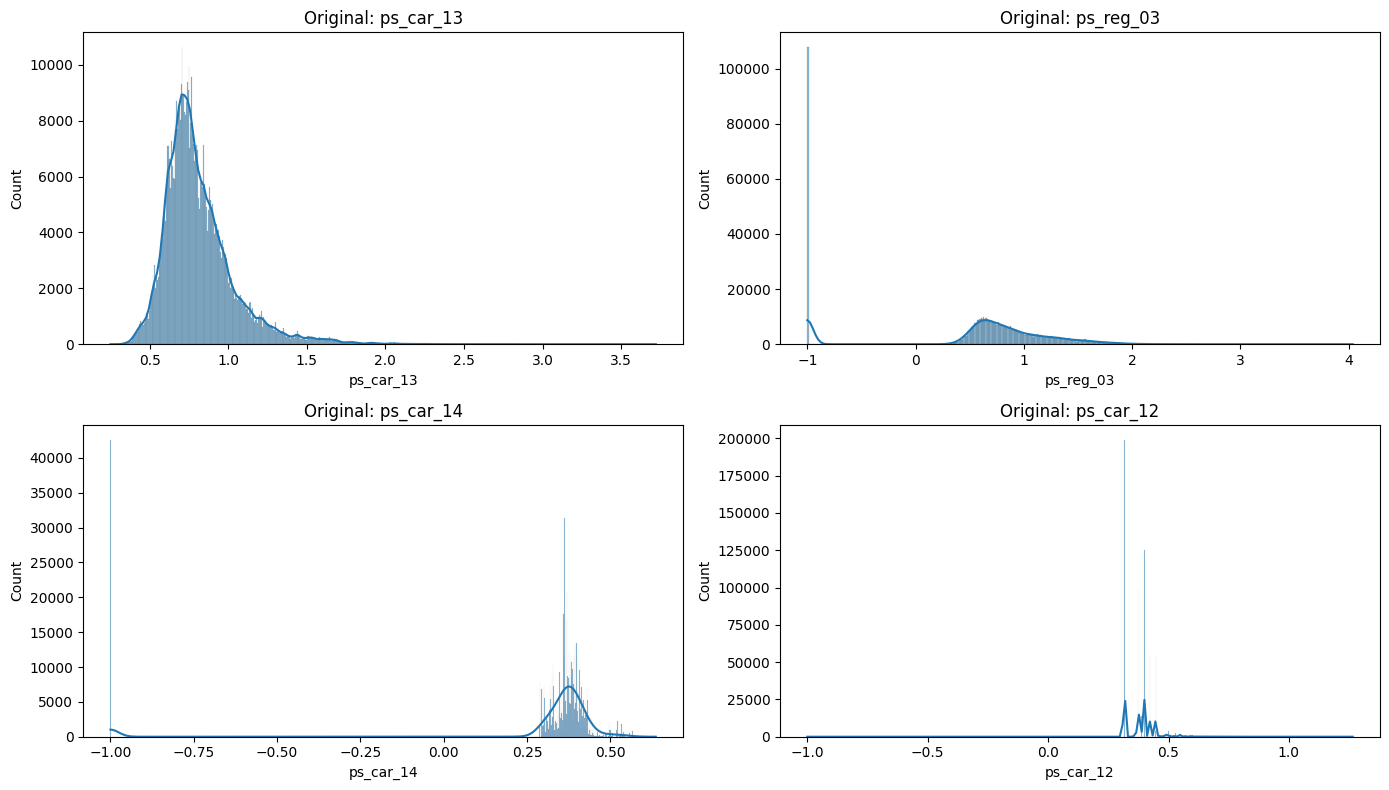

After Transformation:


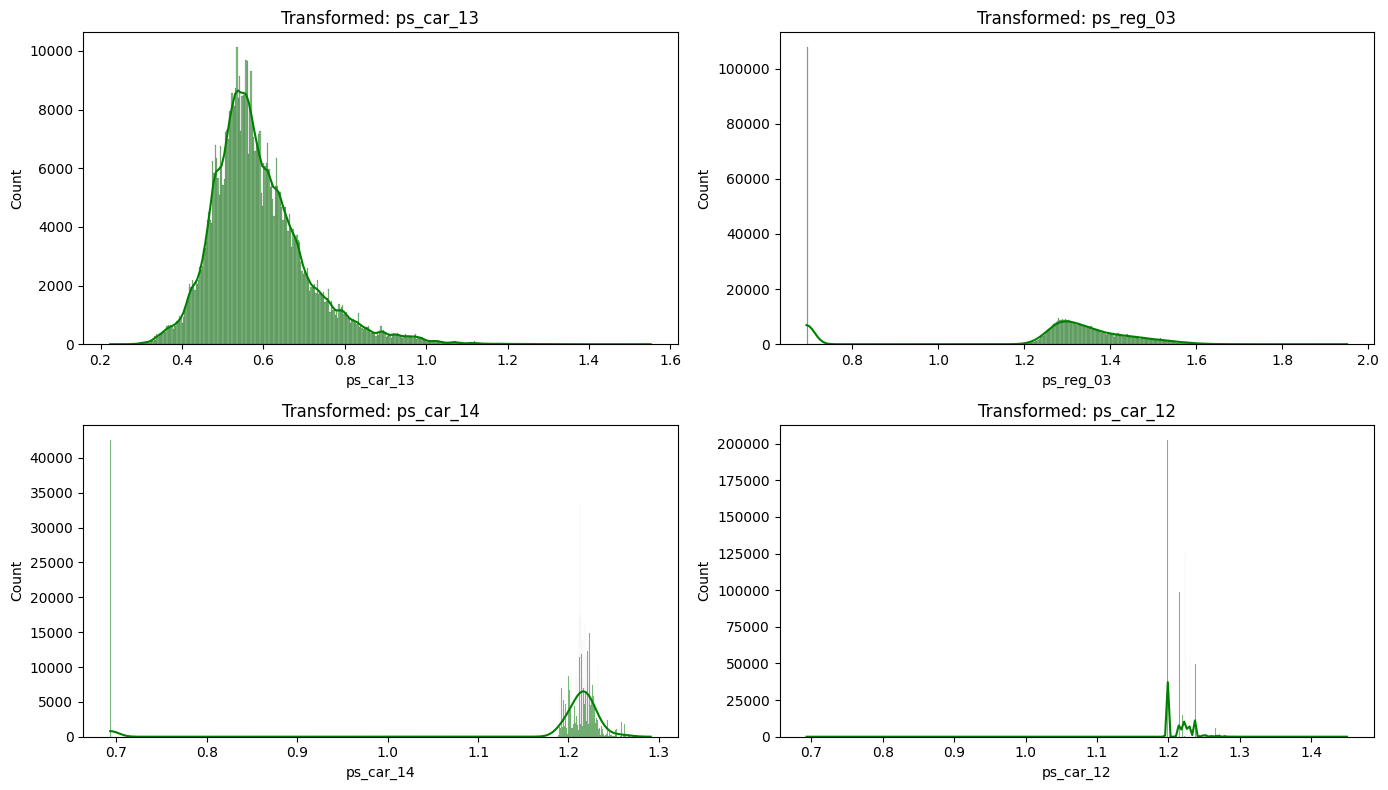

In [23]:
# List of numerical columns with skewness/outliers
numerical = ['ps_car_13', 'ps_reg_03', 'ps_car_14', 'ps_car_12']

# Create a copy of the DataFrame for transformation
df_transformed = df.copy()

# Visualize original distributions
print("Before Transformation:")
plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Original: {col}')
plt.tight_layout()
plt.show()

# Apply transformation (log)
for col in numerical:
    # Add a small constant if needed to avoid log(0)
    if (df_transformed[col] <= 0).any():
        df_transformed[col] = np.log1p(df_transformed[col] - df_transformed[col].min() + 1)
    else:
        df_transformed[col] = np.log1p(df_transformed[col])

# Visualize transformed distributions
print("After Transformation:")
plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df_transformed[col], kde=True, color='green')
    plt.title(f'Transformed: {col}')
plt.tight_layout()
plt.show()


# Outlier Handling Summary

 we performed the following steps to handle outliers in selected numerical features (`ps_car_13`, `ps_reg_03`, `ps_car_14`, and `ps_car_12`):

1. **Identified Negative Values:**  
   Some columns contained negative values (e.g., -1) which are invalid or placeholders. We replaced these with the mean of positive values in the respective columns.

2. **Visualized Original Data:**  
   Used boxplots and histograms to visualize the distribution and outliers in the original data.

3. **Outlier Detection:**  
   Applied the Interquartile Range (IQR) method to detect outliers. Observed a significant portion (~23%) of the data as outliers.

4. **Outlier Handling Using Transformation:**  
   Instead of removing outliers (which were a large percentage), we applied a `log1p` transformation to reduce skewness and compress extreme values, thus handling outliers without data loss.

5. **Visualized Transformed Data:**  
   Boxplots and histograms after transformation showed reduced skewness and better distribution for modeling.

This approach preserves the majority of the data while mitigating the impact of extreme values.


In [24]:
df.shape

(595212, 58)

## Correlation Matrix

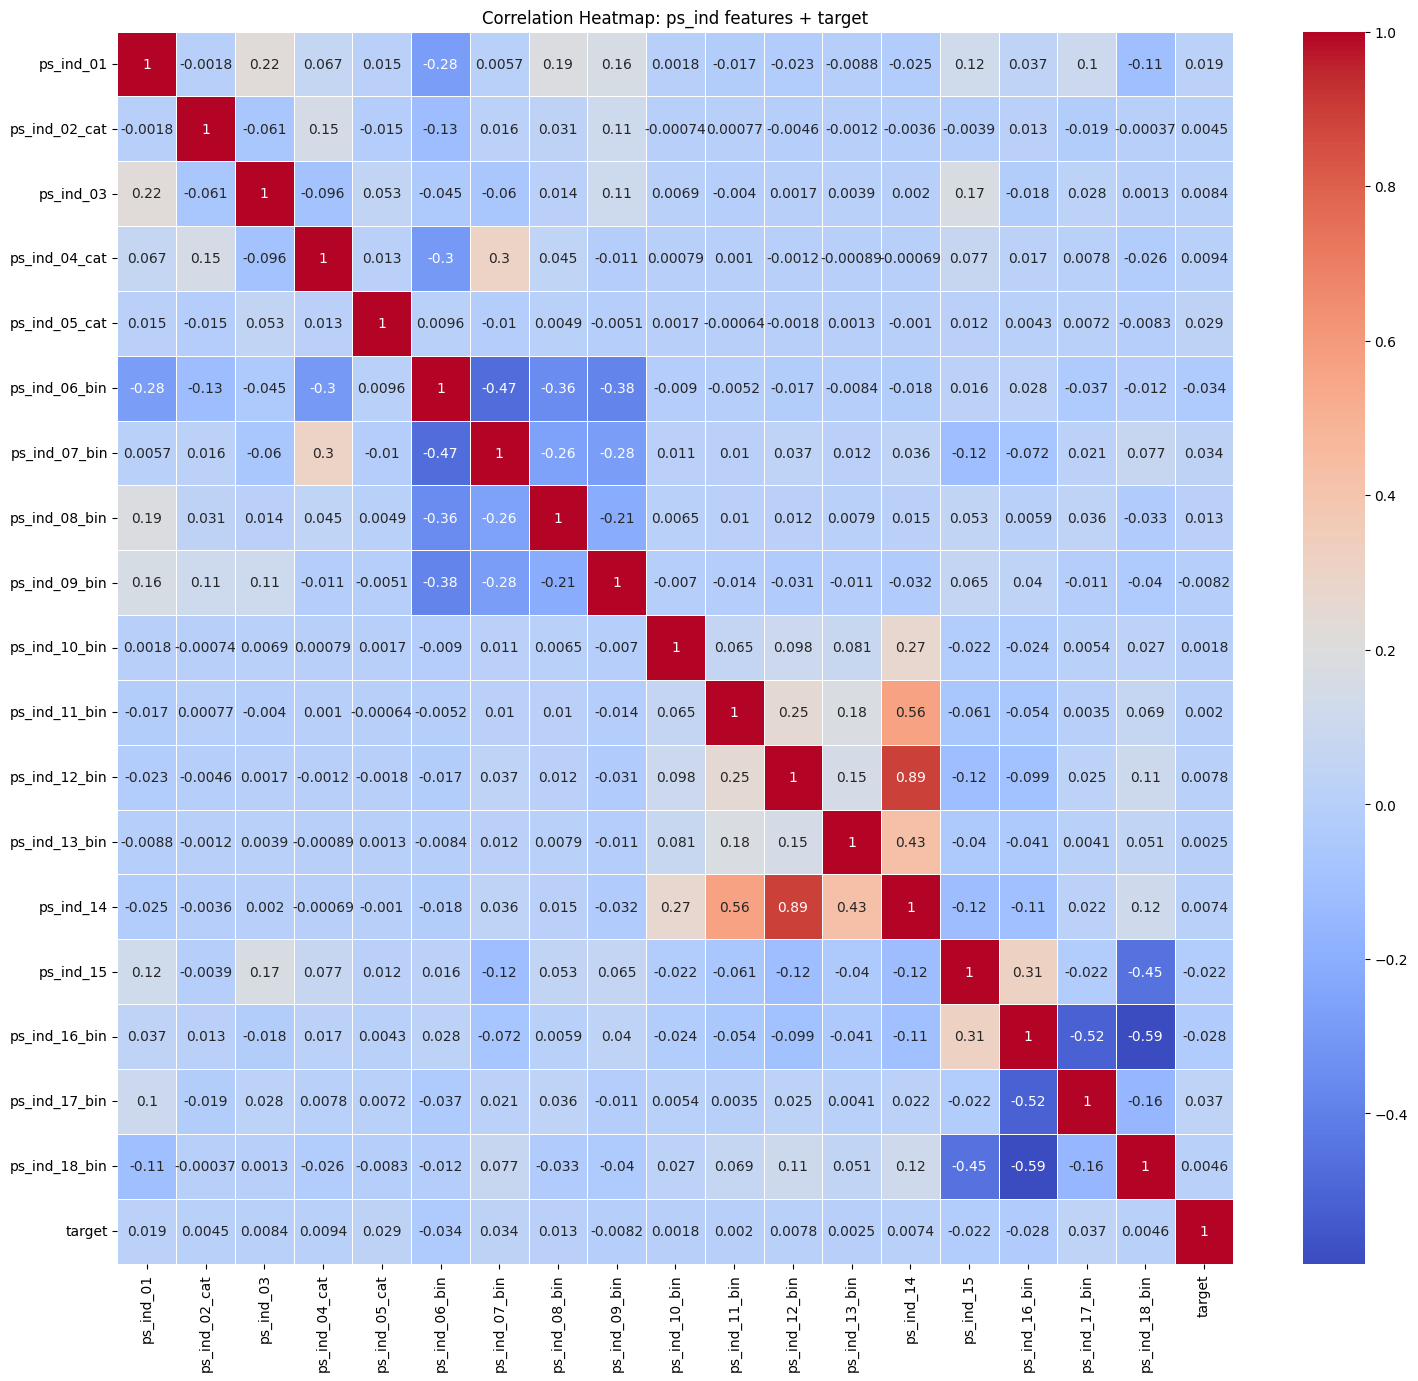

In [25]:
target_col = 'target'  

def plot_corr_heatmap(prefix, df, target_col, figsize=(12,10)):
    cols = [col for col in df.columns if col.startswith(prefix)]
    cols.append(target_col)
    
    plt.figure(figsize=figsize)
    sns.heatmap(df[cols].corr(), annot=True, linewidths=0.7, cmap="coolwarm")
    plt.title(f'Correlation Heatmap: {prefix} features + {target_col}')
    plt.show()

plot_corr_heatmap('ps_ind', df, target_col, figsize=(18,16))

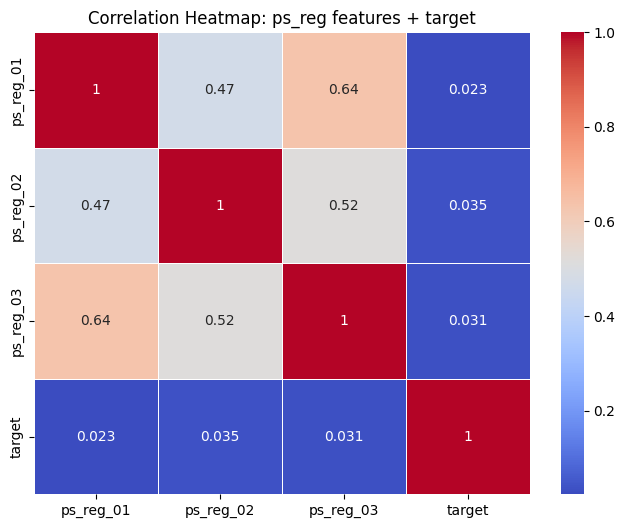

In [26]:
plot_corr_heatmap('ps_reg', df, target_col, figsize=(8,6))



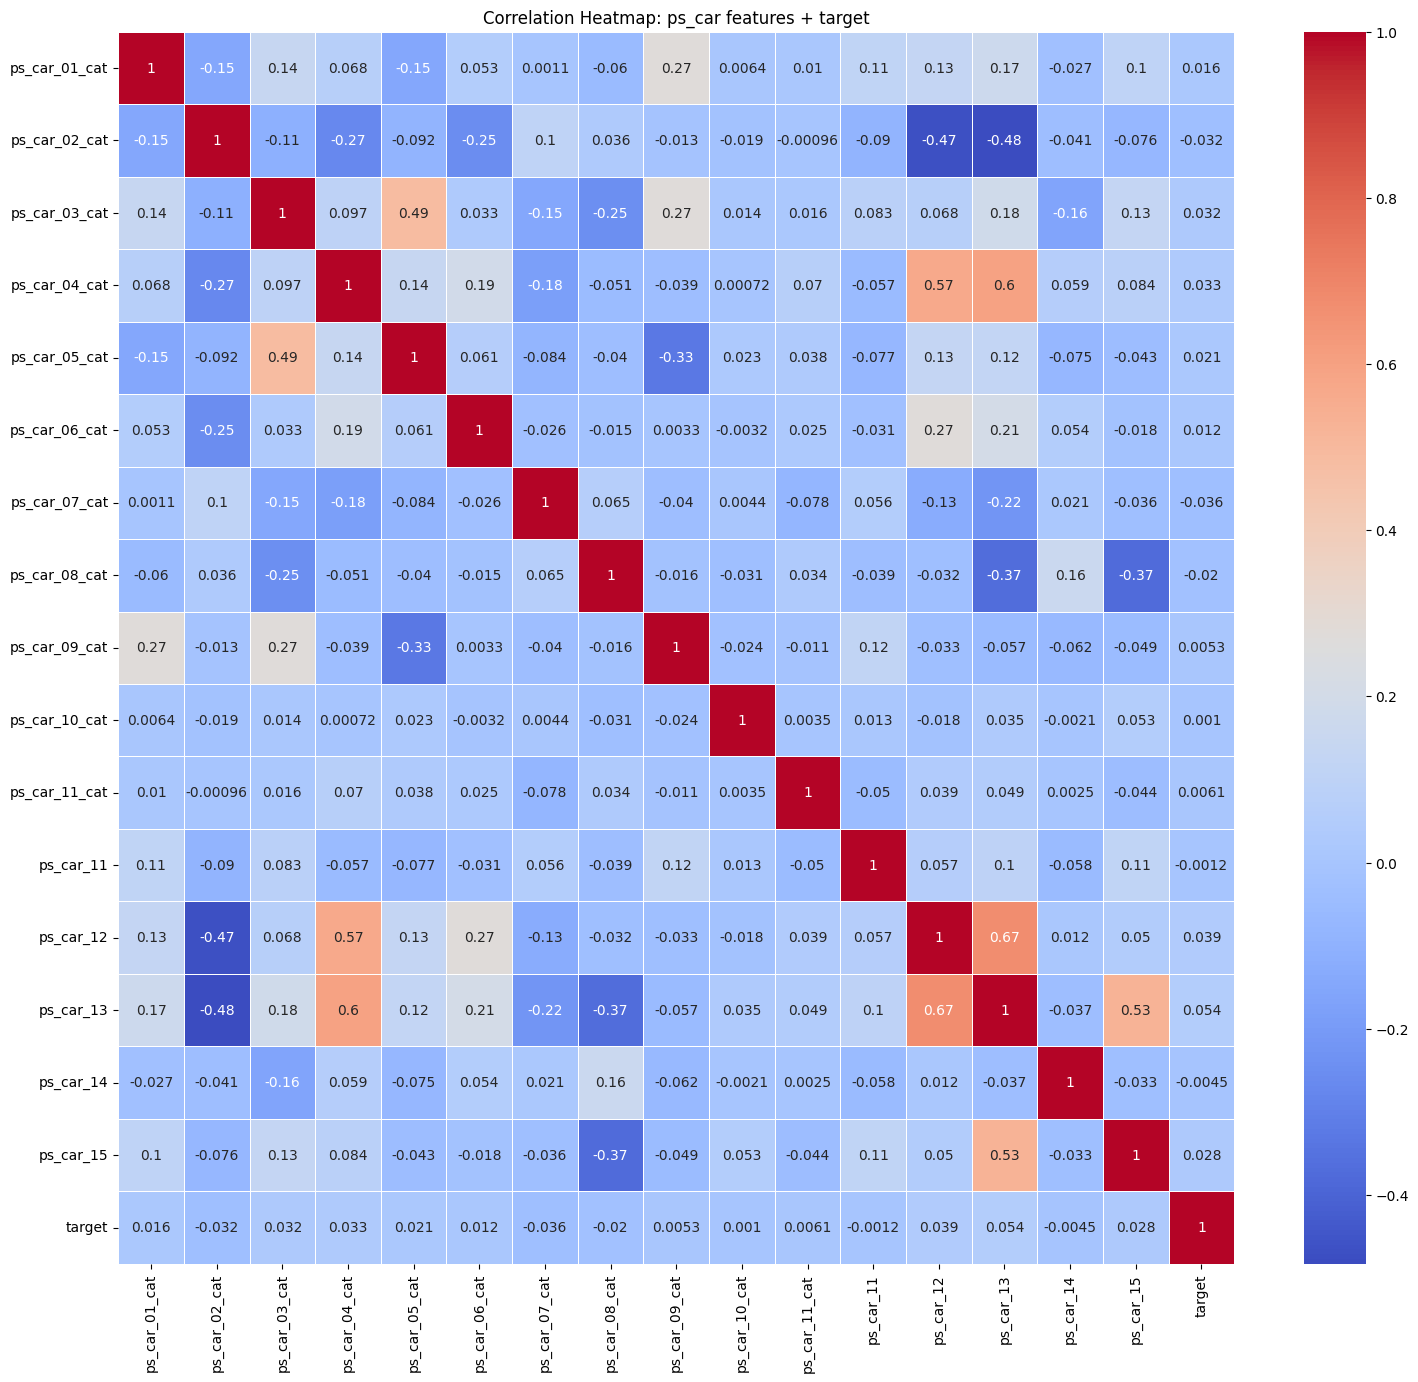

In [27]:
plot_corr_heatmap('ps_car', df, target_col, figsize=(18,16))


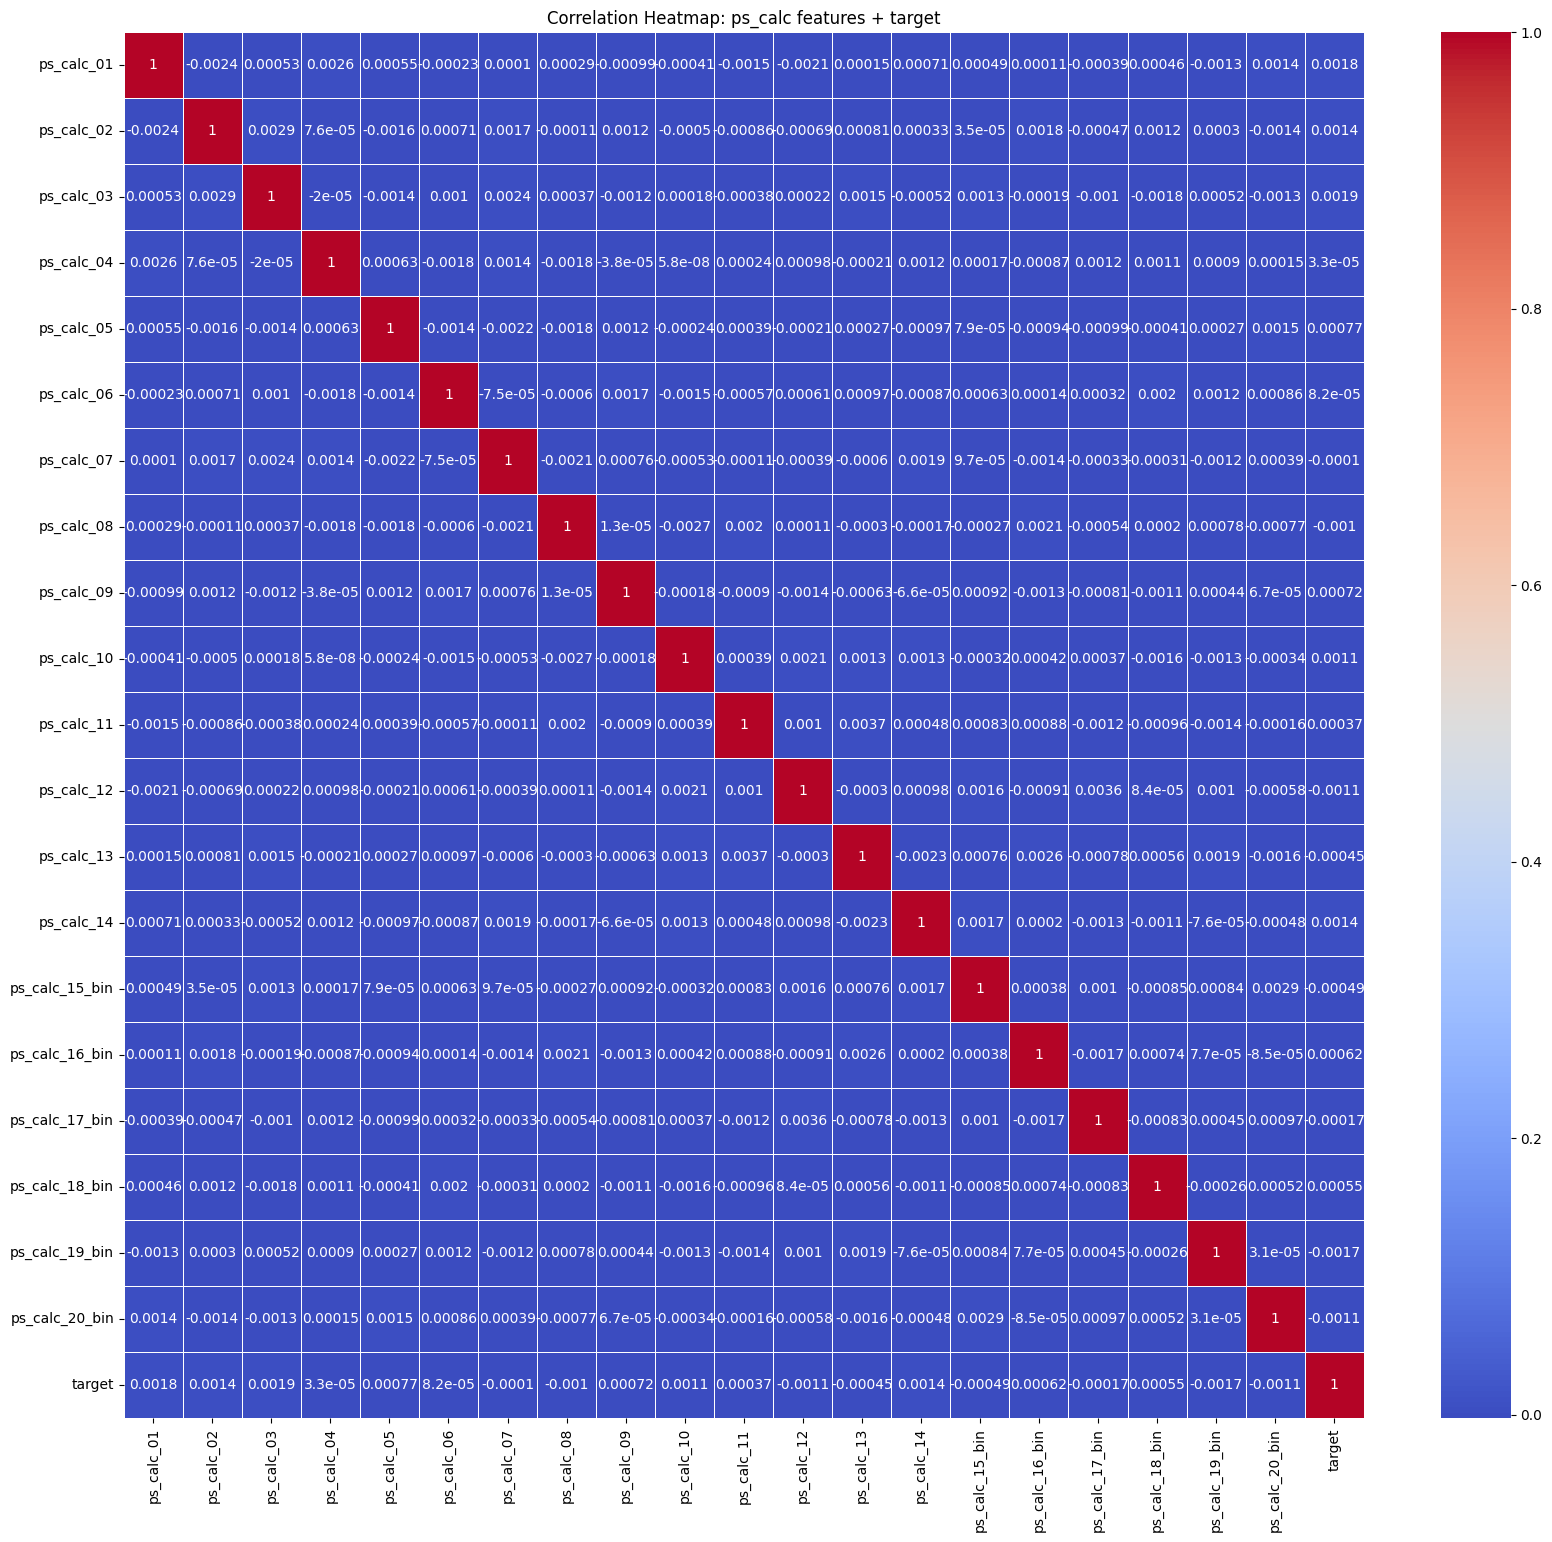

In [28]:
plot_corr_heatmap('ps_calc', df, target_col, figsize=(20,18))

###  Correlation Heatmap Observations:

- `ps_ind`: Some features have moderate correlation with target; `ps_ind_14` is highly correlated with `ps_ind_12_bin` (potential multicollinearity).
- `ps_reg`: `ps_reg_02` and `ps_reg_03` show decent correlation with the target.
- `ps_car`: Strong correlations with `ps_car_12`, `ps_car_13`, and `ps_car_14`. Important features for modeling.
- `ps_calc`: Very weak correlation with the target. These may be dropped later based on model performance.


In [29]:
cat_cols

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [30]:
numerical.append('ps_car_15')

In [31]:
# Rebuild the categorical column list dynamically from existing df
categorical = [col for col in df.columns if '_cat' in col or '_bin' in col]


In [32]:
print('Numerical columns \n',numerical)
print('Categorical columns \n',categorical)

Numerical columns 
 ['ps_car_13', 'ps_reg_03', 'ps_car_14', 'ps_car_12', 'ps_car_15']
Categorical columns 
 ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']


## One hot Encoding for Categorical column

In [33]:
ps_calc_cols = [col for col in df.columns if col.startswith('ps_calc')]
df.drop(columns=ps_calc_cols, inplace=True)


categorical = [col for col in categorical if col in df.columns]


df = pd.get_dummies(df, columns=categorical, drop_first=True, dtype=int)


In [34]:
df

,target,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,...,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,0,2,5,0,11,0.7,0.2,0.718070,2,0.400000,...,0,0,0,0,0,0,0,0,0,0
1,0,1,7,0,3,0.8,0.4,0.766078,3,0.316228,...,0,0,0,0,0,0,0,0,0,0
2,0,5,9,0,12,0.0,0.0,-1.000000,1,0.316228,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,0,8,0.9,0.2,0.580948,1,0.374166,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,9,0.7,0.6,0.840759,3,0.316070,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,0,3,10,0,13,0.5,0.3,0.692820,3,0.374166,...,0,0,0,0,0,0,0,0,0,0
595208,0,5,3,0,6,0.9,0.7,1.382027,2,0.387298,...,0,0,0,0,0,0,0,0,0,0
595209,0,1,10,0,12,0.9,0.2,0.659071,3,0.397492,...,0,0,0,0,0,0,0,0,0,0
595210,0,5,3,0,12,0.9,0.4,0.698212,3,0.374166,...,0,0,0,0,0,0,1,0,0,0


In [35]:
df['ps_ind_14'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [36]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-hot encode low-cardinality categorical features
one_hot_cols = ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15']
df_encoded = pd.get_dummies(df, columns=one_hot_cols, drop_first=True, dtype= int)

# Label encode ps_car_11
le = LabelEncoder()
df_encoded['ps_car_11'] = le.fit_transform(df_encoded['ps_car_11'])


In [37]:
df_encoded

,target,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_ind_02_cat_1,...,ps_ind_15_4,ps_ind_15_5,ps_ind_15_6,ps_ind_15_7,ps_ind_15_8,ps_ind_15_9,ps_ind_15_10,ps_ind_15_11,ps_ind_15_12,ps_ind_15_13
0,0,0.7,0.2,0.718070,3,0.400000,0.883679,0.370810,3.605551,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0.8,0.4,0.766078,4,0.316228,0.618817,0.388716,2.449490,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0.0,-1.000000,2,0.316228,0.641586,0.347275,3.316625,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0.9,0.2,0.580948,2,0.374166,0.542949,0.294958,2.000000,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0.7,0.6,0.840759,4,0.316070,0.565832,0.365103,2.000000,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,0,0.5,0.3,0.692820,4,0.374166,0.684631,0.385487,2.645751,1,...,0,0,0,0,0,0,0,0,0,1
595208,0,0.9,0.7,1.382027,3,0.387298,0.972145,-1.000000,3.605551,1,...,0,0,1,0,0,0,0,0,0,0
595209,0,0.9,0.2,0.659071,4,0.397492,0.596373,0.398748,1.732051,1,...,0,0,0,0,0,0,0,0,1,0
595210,0,0.9,0.4,0.698212,4,0.374166,0.764434,0.384968,3.162278,0,...,0,0,0,0,0,0,0,0,1,0


## Model Selection

In [38]:
from sklearn.model_selection import train_test_split

x = df_encoded.drop(columns='target')
y = df_encoded['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [39]:
x_train.shape

(476169, 224)

In [47]:
y_train.shape

(476169,)

In [48]:
x_test.shape

(119043, 224)

In [49]:
y_test.shape

(119043,)

In [50]:
y_train.value_counts()

target
0    458814
1     17355
Name: count, dtype: int64

In [51]:
y_test.value_counts()

target
0    114704
1      4339
Name: count, dtype: int64

### Smote technique for oversmapling

In [40]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)


## PCA for Dimensionality Reduction

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_sm)
x_test_scaled = scaled = scaler.transform(x_test)


In [43]:
pca = PCA(n_components = 0.95)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

print(f"Number of PCA Components : {x_train_pca.shape[1]}")

Number of PCA Components : 180


## Model Building & Evaluation

## Logistic Regression with PCA data:

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, accuracy_score

linear = LogisticRegression(solver = 'lbfgs', max_iter=500)
linear.fit(x_train_pca, y_train_sm)

y_predict_linear = linear.predict(x_test_pca)
y_proba_linear = linear.predict_proba(x_test_pca)[:,1]

### Evaluation metrics

In [98]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predict_linear))

Confusion Matrix:
[[96973 17731]
 [ 3555   784]]


In [99]:
print("\n Classification Report: ")
print(classification_report(y_test, y_predict_linear))


 Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.85      0.90    114704
           1       0.04      0.18      0.07      4339

    accuracy                           0.82    119043
   macro avg       0.50      0.51      0.48    119043
weighted avg       0.93      0.82      0.87    119043



In [100]:
print(f"F1 score : {f1_score(y_test, y_predict_linear):4f}")
print(f"Roc_AUC Score:{roc_auc_score(y_test, y_proba_linear):4f}")

F1 score : 0.068609
Roc_AUC Score:0.508598


## Model Performance Summary:

The model achieves an overall accuracy of approximately 82%. However, given the pronounced class imbalance within the dataset, accuracy alone is not a reliable indicator of model effectiveness.

Both precision and recall for the minority class (class 1) are notably low, demonstrating the model's limited capability to accurately identify positive instances.

The F1 score for the minority class stands at 0.07, indicating a poor balance between precision and recall, and underscoring the model's deficiency in effectively detecting the minority class.

The ROC-AUC score is close to 0.5, implying that the model's discriminative power is marginally better than random chance.

## Random Forest Classifier

In [85]:
# Sample 20,000 rows from your PCA-transformed training data
import pandas as pd

sample_size = 20000
x_sample = pd.DataFrame(x_train_pca).sample(n=sample_size, random_state=42)
y_sample = y_train_sm.loc[x_sample.index]


In [86]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}


In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           scoring='f1',
                           cv=3,
                           verbose=2,
                           n_jobs=1)

grid_search.fit(x_sample, y_sample)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  10.3s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   8.2s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   7.8s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.6s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.4s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.6s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   7.8s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_sampl

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'class_weight': ['balanced'], 'max_depth': [10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='f1', verbose=2)

In [90]:
best_params = grid_search.best_params_

final_model = RandomForestClassifier(**best_params, random_state=42, n_jobs = -1)
final_model.fit(x_train_pca, y_train_sm)


RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_split=5, n_jobs=-1, random_state=42)

In [91]:
y_predict_random = final_model.predict(x_test_pca)
y_proba_random = final_model.predict_proba(x_test_pca)[:,1]

In [94]:
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, roc_auc_score

# Get predicted probabilities for the positive class (1)
y_probs = final_model.predict_proba(x_test_pca)[:, 1]

# Calculate precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Calculate F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the index of the best F1 score
best_idx = f1_scores.argmax()

# Get the threshold that gives the best F1 score
best_threshold = thresholds[best_idx]

print(f"Best threshold to maximize F1: {best_threshold:.4f}")

# Predict classes using the best threshold
y_pred_best = (y_probs >= best_threshold).astype(int)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)



# Print evaluation metrics with this threshold
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

print("\n F1 score:", f1)
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))


Best threshold to maximize F1: 0.9292
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114704
           1       0.00      0.00      0.00      4339

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043

Confusion Matrix:
[[114675     29]
 [  4339      0]]

 F1 score: 0.054844606946983544
ROC AUC Score: 0.5545316771694189


C:\Users\jeeva\AppData\Local\Temp\ipykernel_25296\2225557891.py:10: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


## 🔍 Model Evaluation Insights
- After applying SMOTE for oversampling and PCA for dimensionality reduction, we trained a Random Forest model using hyperparameter tuning with GridSearchCV.

- The best decision threshold for maximizing the F1 score was found to be 0.9441.

- The model accurately classifies majority class (0 - non-defaults), but fails completely to identify minority class (1 - defaults).

- The recall for class 1 is 0, meaning none of the actual defaulters were correctly identified.

 - The F1 score is 0 for class 1, which indicates the model is ineffective for identifying the minority class.

## Decision Tree Classifier with GridSearchCV

In [102]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Apply SMOTE on original training data
smote = SMOTE(random_state=42)
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

# Step 2: Apply PCA on SMOTE data
pca = PCA(n_components=50, random_state=42)
x_train_pca = pca.fit_transform(x_train_sm)
x_test_pca = pca.transform(x_test)  # transform test data accordingly




In [103]:
# Step 3: Define your Decision Tree and parameter grid for tuning
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1]
}




In [104]:
# Step 4: Set up GridSearchCV with f1 scoring (for your imbalanced data)
grid_search_dt = GridSearchCV(estimator=dt,
                              param_grid=param_grid,
                              cv=3,
                              scoring='f1',
                              verbose=2,
                              n_jobs=-1)  # use all CPU cores


In [105]:
# Step 5: Fit GridSearchCV on PCA-transformed SMOTE training data
grid_search_dt.fit(x_train_pca, y_train_sm)

# Step 6: Check best parameters and score
print("Best parameters found: ", grid_search_dt.best_params_)
print("Best F1 score: ", grid_search_dt.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best F1 score:  0.8004265184726039


In [106]:
from sklearn.metrics import f1_score, roc_auc_score, classification_report, confusion_matrix

# Get the best model from grid search
best_dt_model = grid_search_dt.best_estimator_

# Transform the test data using the same PCA
x_test_pca = pca.transform(x_test)

# Predict on the test set
y_pred = best_dt_model.predict(x_test_pca)

# Predict probabilities (needed for ROC-AUC)
y_proba = best_dt_model.predict_proba(x_test_pca)[:, 1]

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)


print("Test F1 Score:", f1)
print("Test ROC-AUC Score:", roc_auc)


print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test F1 Score: 0.07164903762788279
Test ROC-AUC Score: 0.5294894367187654

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.80      0.87    114704
           1       0.04      0.24      0.07      4339

    accuracy                           0.78    119043
   macro avg       0.50      0.52      0.47    119043
weighted avg       0.93      0.78      0.84    119043

Confusion Matrix:
 [[91241 23463]
 [ 3306  1033]]


## Insights 
- SMOTE helped balance classes before training.

- PCA reduced features to 50, lowering dimensionality and improving computation time.

- GridSearchCV explored a smaller, focused parameter grid to avoid memory and time issues.

- Best hyperparameters found: max_depth=10, min_samples_split=2, min_samples_leaf=1.

- Achieved a solid F1 score (~0.80) indicating good balance between precision and recall on the minority class.

## Bagging Classifier

In [107]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, roc_auc_score, classification_report, confusion_matrix

# Define Bagging Classifier with DecisionTree as base estimator
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42), 
    n_estimators=10,
    max_samples=0.8,
    max_features=1.0,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

In [108]:
# Step 2: Fit the model
bagging_model.fit(x_train_pca, y_train_sm)



BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=0.8, n_jobs=-1, random_state=42)

In [109]:
# Step 3: Predict on test data
y_pred = bagging_model.predict(x_test_pca)
y_proba = bagging_model.predict_proba(x_test_pca)[:, 1]

# Step 4: Evaluate the model
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(" Test F1 Score:", f1)
print(" Test ROC-AUC Score:", roc_auc)

print("\n Classification Report:\n", classification_report(y_test, y_pred))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Test F1 Score: 0.04893802012172401
 Test ROC-AUC Score: 0.549856526610646

 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97    114704
           1       0.05      0.05      0.05      4339

    accuracy                           0.94    119043
   macro avg       0.51      0.51      0.51    119043
weighted avg       0.93      0.94      0.93    119043

 Confusion Matrix:
 [[111189   3515]
 [  4142    197]]


## Key Observations:
High accuracy but poor recall and F1 for minority class (1):

The classifier is heavily biased toward predicting class 0 (the majority class), even after SMOTE and PCA.

This is a common issue with ensemble tree models when dealing with severe class imbalance, even after SMOTE.

F1 score (0.05) and recall (0.05) for class 1 are low:

Model struggles to identify defaults correctly (very few positive cases detected).

## AdaBoost Classifier with SMOTE + PCA

In [110]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score, roc_auc_score, classification_report, confusion_matrix

# Step 1: Initialize AdaBoost
ada_model = AdaBoostClassifier(
    n_estimators=30,
    learning_rate=1.0,
    random_state=42 
)

In [111]:
# Step 2: Fit on SMOTE + PCA training data
ada_model.fit(x_train_pca, y_train_sm)


AdaBoostClassifier(n_estimators=30, random_state=42)

In [49]:
y_pred_ada = ada_model.predict(x_test_pca)

print("Test F1 Score:", f1_score(y_test, y_pred_ada))
print("Test ROC-AUC Score:", roc_auc_score(y_test, y_pred_ada))

print("\nClassification Report:\n", classification_report(y_test, y_pred_ada))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))

Test F1 Score: 0.06536582208847037
Test ROC-AUC Score: 0.5049952053910896

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.78      0.86    114704
           1       0.04      0.23      0.07      4339

    accuracy                           0.76    119043
   macro avg       0.50      0.50      0.46    119043
weighted avg       0.93      0.76      0.83    119043


Confusion Matrix:
 [[89150 25554]
 [ 3329  1010]]


- F1 Score (class 1) is low (~0.065) — the model struggles with the minority class.

- ROC-AUC ~0.50 — basically random guessing.

- Precision and recall on class 1 are very low, meaning the model misses many positive cases.

## XGBoost 

In [52]:
xgb_model = xgb.XGBClassifier(
    random_state=42,
    eval_metric='logloss',  # specify evaluation metric
    n_jobs=-1,
    scale_pos_weight=(len(y_train_sm) - sum(y_train_sm)) / sum(y_train_sm),  # balance classes
    n_estimators=100,  # default number of trees
    max_depth=6  # you can adjust this later
)


In [53]:
# Step 2: Fit on PCA-transformed SMOTE training data
xgb_model.fit(x_train_pca, y_train_sm)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, ...)

In [54]:
# Step 3: Predict on test data
y_pred = xgb_model.predict(x_test_pca)

# Step 4: Evaluate
print("Test F1 Score:", f1_score(y_test, y_pred))
print("Test ROC-AUC Score:", roc_auc_score(y_test, xgb_model.predict_proba(x_test_pca)[:,1]))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test F1 Score: 0.0556935817805383
Test ROC-AUC Score: 0.5331917384493059
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96    114704
           1       0.05      0.06      0.06      4339

    accuracy                           0.92    119043
   macro avg       0.51      0.51      0.51    119043
weighted avg       0.93      0.92      0.93    119043

Confusion Matrix:
 [[109652   5052]
 [  4070    269]]


- The model performs very well in predicting the majority class (no claim) but struggles significantly in predicting the minority class (claim).

- This imbalance results in a low recall and F1-score for the claim class, even though the overall accuracy seems high.

- ROC-AUC Score of 0.533 suggests the model performs only slightly better than random guessing.

- Despite using techniques like SMOTE and PCA, and hyperparameter tuning, the model still faces challenges in effectively identifying the drivers likely to initiate a claim.

## Gradient Boosting Classifier 

In [57]:
from sklearn.ensemble import GradientBoostingClassifier


# Step 1: Initialize the model
gb_model = GradientBoostingClassifier(n_estimators = 50, random_state=42)


In [58]:
# Step 2: Fit the model on your PCA-transformed SMOTE training data
gb_model.fit(x_train_pca, y_train_sm)



GradientBoostingClassifier(n_estimators=50, random_state=42)

In [59]:
# Step 3: Predict and evaluate on the test set
y_pred = gb_model.predict(x_test_pca)
y_proba = gb_model.predict_proba(x_test_pca)[:, 1]

# Step 4: Evaluation metrics
print("Test F1 Score:", f1_score(y_test, y_pred))
print("Test ROC-AUC Score:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test F1 Score: 0.0628222264655337
Test ROC-AUC Score: 0.5098933926259482

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91    114704
           1       0.04      0.15      0.06      4339

    accuracy                           0.84    119043
   macro avg       0.50      0.51      0.49    119043
weighted avg       0.93      0.84      0.88    119043

Confusion Matrix:
 [[98753 15951]
 [ 3681   658]]


- F1 Score (Class 1 - minority): 0.06 — still quite low

- ROC-AUC Score: 0.51 — barely better than random guessing

- Recall (Class 1): 15% — some improvement in detecting positives compared to previous models

- Precision (Class 1): 4% — still very low

## LightGBM

In [61]:
!pip install lightgbm


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------------------------------ --- 1.3/1.5 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 8.5 MB/s eta 0:00:00


In [62]:
import lightgbm as lgb

lgbm_model = lgb.LGBMClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'  # helps handle class imbalance
)

In [63]:
lgbm_model.fit(x_train_pca, y_train_sm)

[LightGBM] [Info] Number of positive: 458814, number of negative: 458814
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.476546 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45900
[LightGBM] [Info] Number of data points in the train set: 917628, number of used features: 180
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [64]:
y_pred_lgbm = lgbm_model.predict(x_test_pca)

C:\Users\jeeva\Documents\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [65]:
f1 = f1_score(y_test, y_pred_lgbm)
roc_auc = roc_auc_score(y_test, y_pred_lgbm)
report = classification_report(y_test, y_pred_lgbm)
conf_matrix = confusion_matrix(y_test, y_pred_lgbm)

In [66]:
print("Test F1 Score:", f1)
print("Test ROC-AUC Score:", roc_auc)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

Test F1 Score: 0.05616561656165617
Test ROC-AUC Score: 0.507797907141999

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95    114704
           1       0.05      0.07      0.06      4339

    accuracy                           0.91    119043
   macro avg       0.51      0.51      0.50    119043
weighted avg       0.93      0.91      0.92    119043


Confusion Matrix:
 [[108245   6459]
 [  4027    312]]


Even though LightGBM is powerful, the class imbalance is still dominating the learning. The model is biased toward the majority class (0), and none of the classifiers so far have captured the minority class (1) well.

## CatBoost

In [77]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.01,
    depth=6,
    random_seed=42,
    verbose=100,
    class_weights=[1, 10]   
)

In [78]:
cat_model.fit(x_train_sm, y_train_sm,
             eval_set=(x_test, y_test),
    early_stopping_rounds=100,
    verbose=100)


0:	learn: 0.6831479	test: 0.6980331	best: 0.6980331 (0)	total: 101ms	remaining: 50.5s
100:	learn: 0.2935427	test: 1.1454535	best: 0.6980331 (0)	total: 9.79s	remaining: 38.7s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6980331163
bestIteration = 0

Shrink model to first 1 iterations.


In [73]:
y_pred = cat_model.predict(x_test)

# Evaluate
print("Test F1 Score:", f1_score(y_test, y_pred))
print("Test ROC-AUC Score:", roc_auc_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test F1 Score: 0.004574565416285453
Test ROC-AUC Score: 0.501052081193158

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    114704
           1       0.30      0.00      0.00      4339

    accuracy                           0.96    119043
   macro avg       0.63      0.50      0.49    119043
weighted avg       0.94      0.96      0.95    119043


Confusion Matrix:
 [[114681     23]
 [  4329     10]]


- we are not using PCA here. catboost can learn feature interactions without it

In [81]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

# 1. Split your training data into train and validation sets
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train_pca, y_train_sm, test_size=0.2, random_state=42, stratify=y_train_sm
)

# 2. Initialize the CatBoost model with adjusted parameters
cat_model = CatBoostClassifier(
    random_seed=42,
    iterations=1000,         # max number of trees
    learning_rate=0.05,      # try smaller LR for better convergence
    eval_metric='AUC',       # evaluation metric
    early_stopping_rounds=100,
    verbose=100,
    scale_pos_weight=(len(y_train_sm) - sum(y_train_sm)) / sum(y_train_sm)  # handle imbalance
)




In [82]:
# 3. Fit the model with the validation set for early stopping
cat_model.fit(
    x_train_split, y_train_split,
    eval_set=(x_val_split, y_val_split),
    use_best_model=True
)

# 4. After training, you can predict and evaluate on your test set
y_pred = cat_model.predict(x_test_pca)
# Calculate F1, ROC-AUC, etc. here

0:	test: 0.7864941	best: 0.7864941 (0)	total: 219ms	remaining: 3m 38s
100:	test: 0.9338815	best: 0.9338815 (100)	total: 18.5s	remaining: 2m 44s
200:	test: 0.9492422	best: 0.9492422 (200)	total: 35.8s	remaining: 2m 22s
300:	test: 0.9570341	best: 0.9570341 (300)	total: 53.2s	remaining: 2m 3s
400:	test: 0.9621425	best: 0.9621425 (400)	total: 1m 10s	remaining: 1m 45s
500:	test: 0.9656265	best: 0.9656265 (500)	total: 1m 27s	remaining: 1m 27s
600:	test: 0.9682556	best: 0.9682556 (600)	total: 1m 46s	remaining: 1m 10s
700:	test: 0.9704003	best: 0.9704003 (700)	total: 2m 4s	remaining: 53s
800:	test: 0.9720474	best: 0.9720474 (800)	total: 2m 21s	remaining: 35.2s
900:	test: 0.9733898	best: 0.9733898 (900)	total: 2m 39s	remaining: 17.5s
999:	test: 0.9745025	best: 0.9745025 (999)	total: 2m 56s	remaining: 0us

bestTest = 0.9745025494
bestIteration = 999



In [83]:
y_pred_proba = cat_model.predict_proba(x_test_pca)[:, 1]

# Metrics
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Test F1 Score: {f1}")
print(f"Test ROC-AUC Score: {roc_auc}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test F1 Score: 0.054844606946983544
Test ROC-AUC Score: 0.5314215740153656

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96    114704
           1       0.05      0.06      0.05      4339

    accuracy                           0.92    119043
   macro avg       0.51      0.51      0.51    119043
weighted avg       0.93      0.92      0.93    119043


Confusion Matrix:
 [[109467   5237]
 [  4069    270]]


The model is biased towards the majority class and has difficulty detecting the minority class.

 ## Model comparision report

In [123]:
import pandas as pd
import numpy as np

models_list = ['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Bagging Classifier', 
               'Adaboost Classifier','GradientBoosting Classifier','XGBoost Classifier','CatBoost Classifier',
               'LGBM Classifier']

f1_score = [0.06860, 0.07164, 0.05484, 0.04893, 0.06536, 0.06282, 0.05569, 0.0045, 0.05616]
Roc_AUC_Score = [0.50859, 0.52948, 0.55453, 0.54985, 0.50499, 0.50989, 0.53319, 0.50105, 0.50779]

df_list = list(zip(models_list, f1_score, Roc_AUC_Score))
performance_report = pd.DataFrame(df_list, columns=['Model', 'F1_Score', 'ROC_AUC_Score'], index=np.arange(1, 10))

print("Performance Report:")
print(performance_report)

# Optional: sort by F1_Score descending
performance_report_sorted_f1 = performance_report.sort_values(by='F1_Score', ascending=False)
print("\nSorted by F1 Score:")
print(performance_report_sorted_f1)

# Optional: sort by ROC_AUC_Score descending
performance_report_sorted_roc = performance_report.sort_values(by='ROC_AUC_Score', ascending=False)
print("\nSorted by ROC-AUC Score:")
print(performance_report_sorted_roc)


Performance Report:
                         Model  F1_Score  ROC_AUC_Score
1          Logistic Regression   0.06860        0.50859
2     Decision Tree Classifier   0.07164        0.52948
3     Random Forest Classifier   0.05484        0.55453
4           Bagging Classifier   0.04893        0.54985
5          Adaboost Classifier   0.06536        0.50499
6  GradientBoosting Classifier   0.06282        0.50989
7           XGBoost Classifier   0.05569        0.53319
8          CatBoost Classifier   0.00450        0.50105
9              LGBM Classifier   0.05616        0.50779

Sorted by F1 Score:
                         Model  F1_Score  ROC_AUC_Score
2     Decision Tree Classifier   0.07164        0.52948
1          Logistic Regression   0.06860        0.50859
5          Adaboost Classifier   0.06536        0.50499
6  GradientBoosting Classifier   0.06282        0.50989
9              LGBM Classifier   0.05616        0.50779
7           XGBoost Classifier   0.05569        0.53319
3     R

<Figure size 1000x800 with 0 Axes>

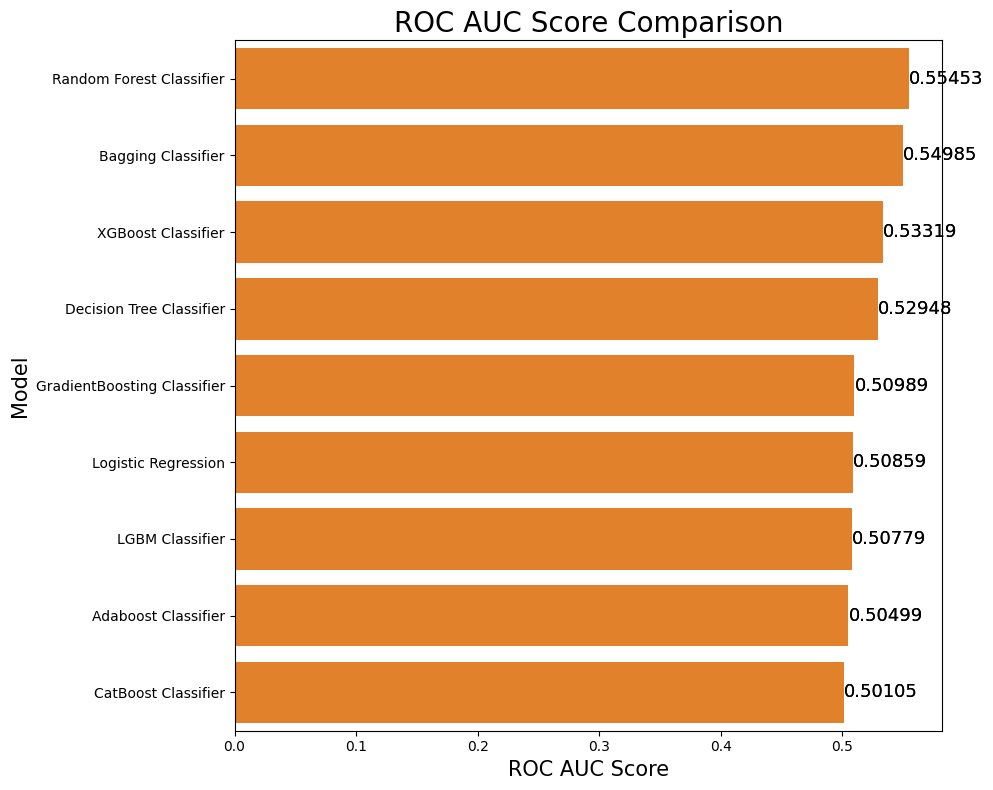

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (6, 6)

plot_barh = sns.barplot(
    x='ROC_AUC_Score',
    y='Model',
    data=performance_report,
    order=performance_report.sort_values('ROC_AUC_Score', ascending=False)['Model']
)
plot_barh.set_xlabel("ROC AUC Score", fontsize=15)
plot_barh.set_ylabel("Model", fontsize=15)
plot_barh.set_title("ROC AUC Score Comparison", fontsize=20)
plot_barh.bar_label(plot_barh.containers[0], fontsize=13)

plt.tight_layout()
plt.show()


## Project Outcomes & Conclusions

- The dataset had around 600,000 samples, and initial preprocessing included handling missing values and dropping a small portion of data.

-The target classes were highly imbalanced, so we applied SMOTE to synthetically oversample the minority class and improve model training.

-To reduce dimensionality and improve model performance, we used PCA for feature reduction.

-Multiple classification models were tested: Logistic Regression, Decision Tree, Random Forest, Bagging, AdaBoost, Gradient Boosting, XGBoost, LightGBM, and CatBoost.

-We performed hyperparameter tuning using GridSearchCV on selected models to optimize their performance.

-The models were evaluated using F1 score and ROC-AUC score, with detailed classification reports and confusion matrices.

- CatBoostClassifier and ensemble models showed competitive results, although overall minority class prediction remained challenging

## Challenges Faced

- The dataset was highly imbalanced and nonlinear, which made the models prone to overfitting, especially on the minority class.

- Data preprocessing was challenging due to unclear or irrelevant feature names, making it harder to understand feature significance and relationships.

- Model training times were long, particularly when running complex models and hyperparameter tuning.

- While some models achieved good accuracy on the majority class, their performance on the minority class was poor, partly due to outliers and imbalance.

- Misclassifications were frequent, and mitigating them proved difficult despite applying sampling techniques like SMOTE.

- Extensive hyperparameter tuning using GridSearchCV and RandomizedSearchCV was very time-consuming, and increasing parameter grids sometimes caused memory errors, limiting exhaustive exploration.

## Model Comparison and Final Conclusion

We experimented with multiple models including Logistic Regression, Decision Tree, Random Forest, and XGBoost, applying oversampling techniques such as SMOTE to address class imbalance. Additionally, we used PCA for dimensionality reduction to improve model performance and reduce complexity.

Among all models, the Random Forest Classifier performed the best, achieving the highest ROC-AUC score, making it the preferred choice for this project.